### Imports


In [36]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

comp='shannon'
import sys  # update paths
sys.path.append('../../')

import os 
import numpy as np 
import matplotlib.pyplot as plt
import copy
sys.path.append('../../')

import meas_analysis.handy as hy
import scresonators.fit_resonator.ana_resonator as ana_res
import scresonators.fit_resonator.ana_tls as ana_tls
import seaborn as sns
import scipy.constants as cs
from scipy.optimize import curve_fit

colors = ['#4053d3', '#b51d14', '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(colors)

if comp=='shannon':
    pth_base ='/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/'
elif comp=='bf1':
    pth_base='G:/'

folder = 'My Drive/Projects/Materials/'
pth = pth_base+folder
img_pth = pth+'Outputs/Resonators/'

meas = 'full_qubitB'
#meas = 'silicon-scalinq-0'
#meas = 'silicon-waffle-1108'
#meas = 'silicon-waffle-phase'
meas = 'sil3_test_sweep'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import yaml

with open('resonator_meas.yaml', 'r') as file:
    sample_dict = yaml.safe_load(file)

matching_keys = [key for key, items in sample_dict.items() for item in items['meas'] if item == meas]
sample = matching_keys[0] if matching_keys else None

ind = sample_dict[sample]['meas'].index(meas)
print(ind)
# data_pth = pth_base+folder+'Data/'+sample_dict[sample]['pth']
params = sample_dict[sample]

data_pth = pth_base+folder+'Data/'+params['pth'][ind]
img_name = params['pth'][ind][0:-1] +params['meas'][ind]

1


In [38]:
sample_dict
params['temp']=0.04 
if 'slope' in params: 
    slope=params['slope'][ind]
else: 
    slope=0

In [39]:
params['dir'][ind]

['powersweep2']

## Sweep power/temp, plot results

### Run sweep 

Counter({63574: 11, 66040: 11, 58912: 11, 62403: 11, 73052: 10, 68543: 10, 69253: 10, 78450: 10})
Counter({63574: 11, 66040: 11, 58912: 11, 62403: 11, 73052: 10, 68543: 10, 69253: 10, 78450: 10})
['res_58912_60', 'res_58912_55', 'res_58912_50', 'res_58912_45', 'res_58912_40', 'res_58912_35', 'res_58912_30', 'res_58912_25', 'res_58912_20', 'res_58912_15', 'res_58912_10']
['res_62403_60', 'res_62403_55', 'res_62403_50', 'res_62403_45', 'res_62403_40', 'res_62403_35', 'res_62403_30', 'res_62403_25', 'res_62403_20', 'res_62403_15', 'res_62403_10']
['res_63574_60', 'res_63574_55', 'res_63574_50', 'res_63574_45', 'res_63574_40', 'res_63574_35', 'res_63574_30', 'res_63574_25', 'res_63574_20', 'res_63574_15', 'res_63574_10']
['res_66040_60', 'res_66040_55', 'res_66040_50', 'res_66040_45', 'res_66040_40', 'res_66040_35', 'res_66040_30', 'res_66040_25', 'res_66040_20', 'res_66040_15', 'res_66040_10']
['res_68543_55', 'res_68543_50', 'res_68543_45', 'res_68543_40', 'res_68543_35', 'res_68543_30',

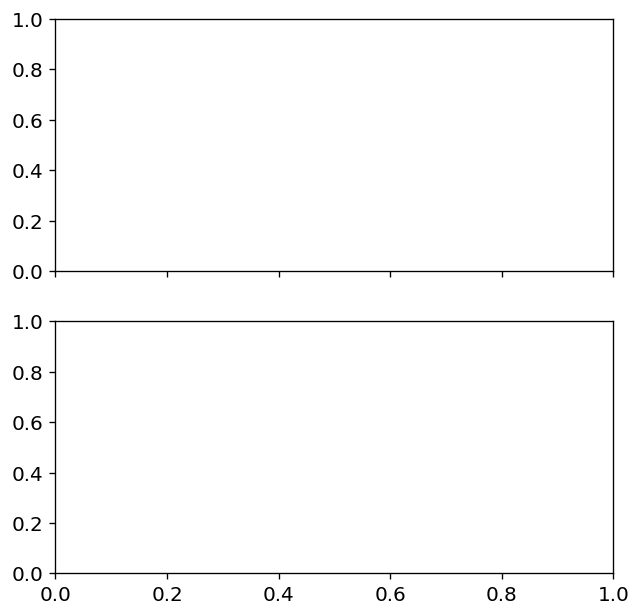

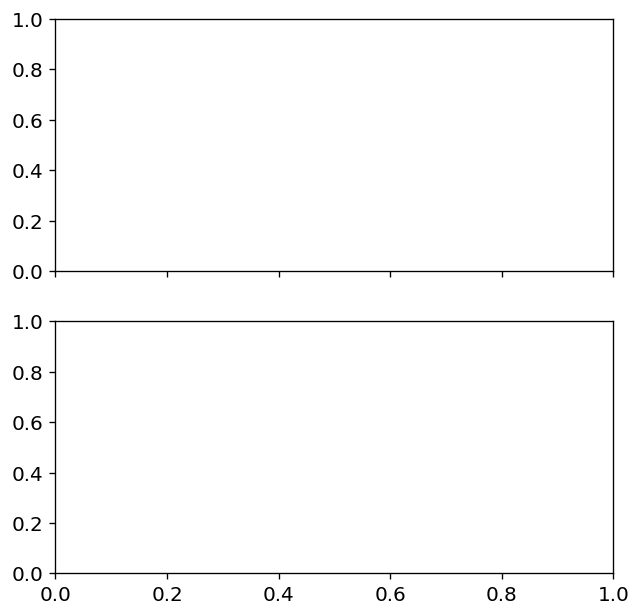

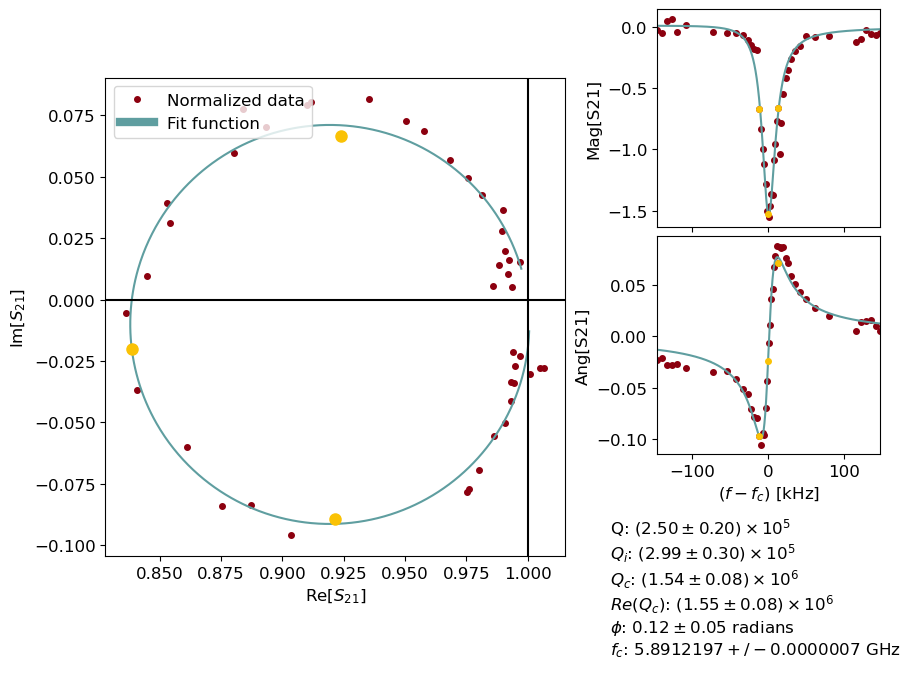

-30.0


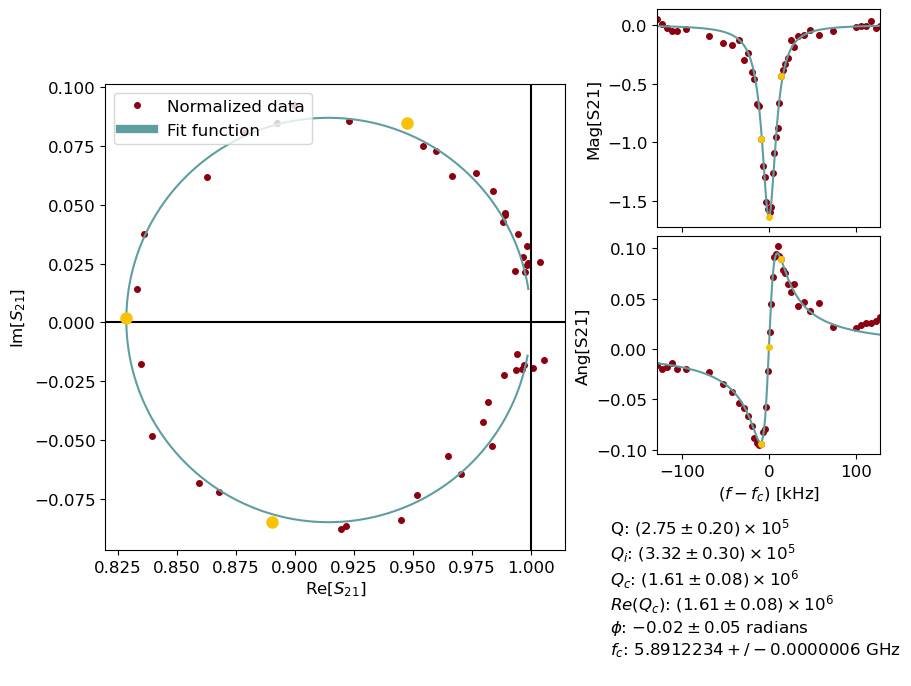

-30.0


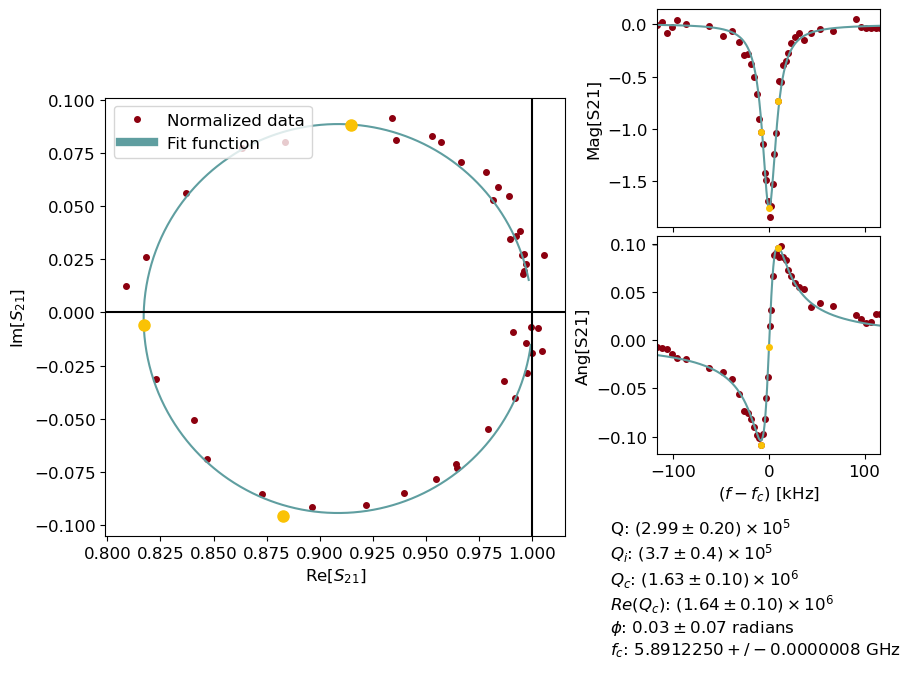

-30.0


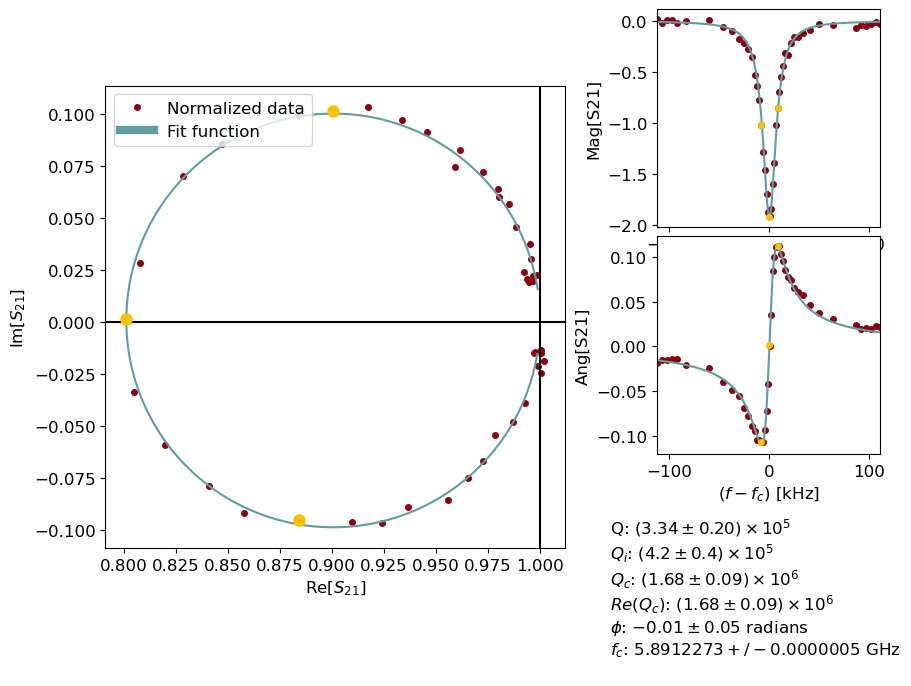

-30.0


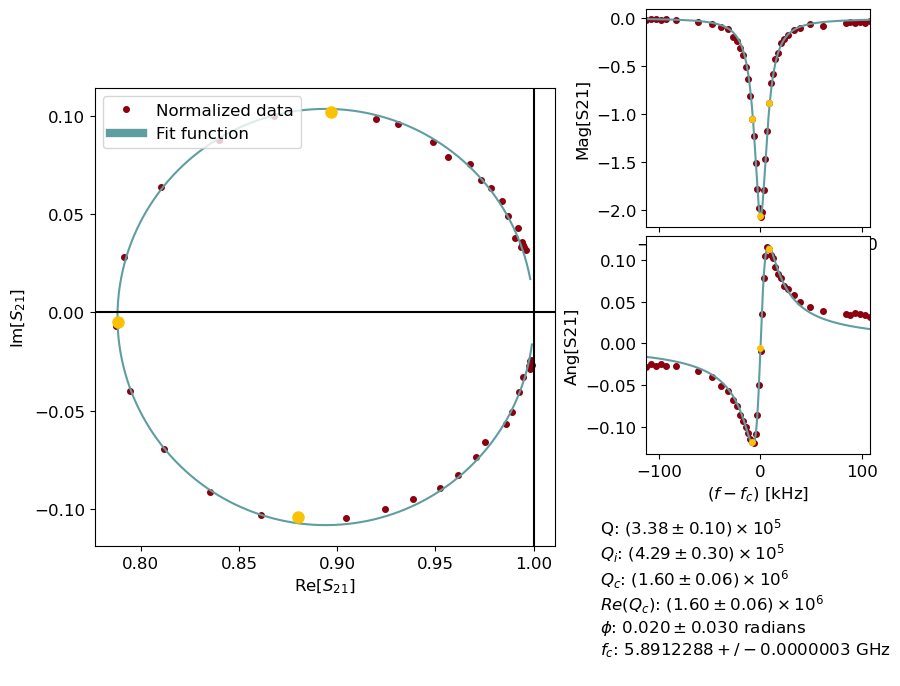

-30.0


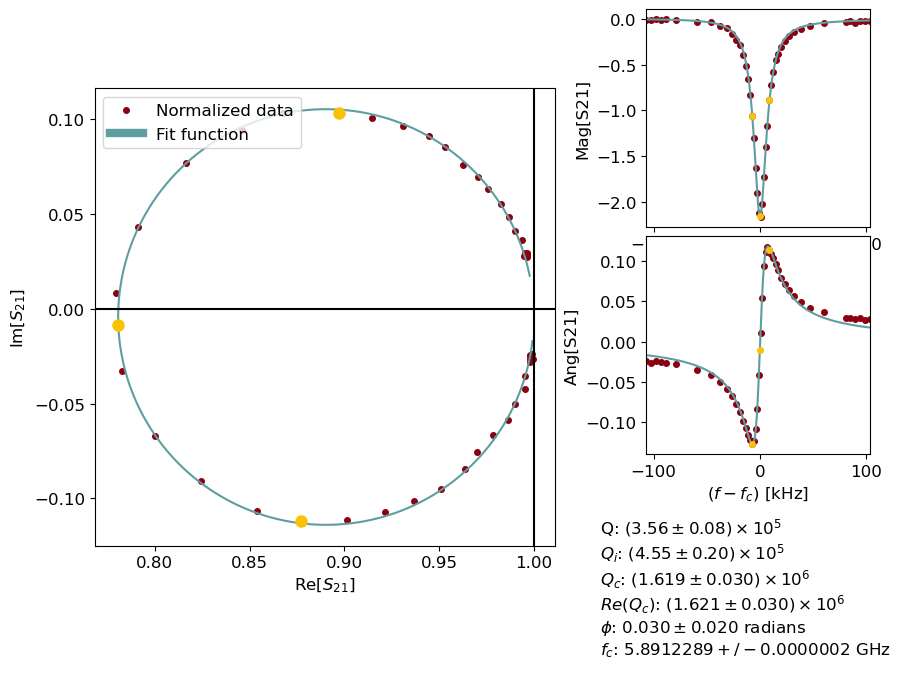

-30.0


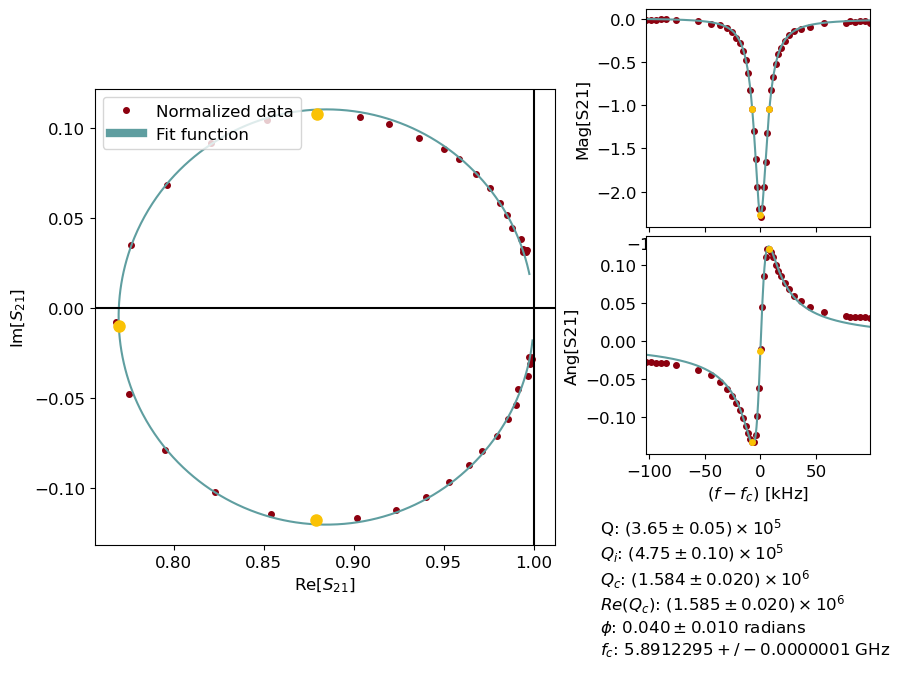

-30.0


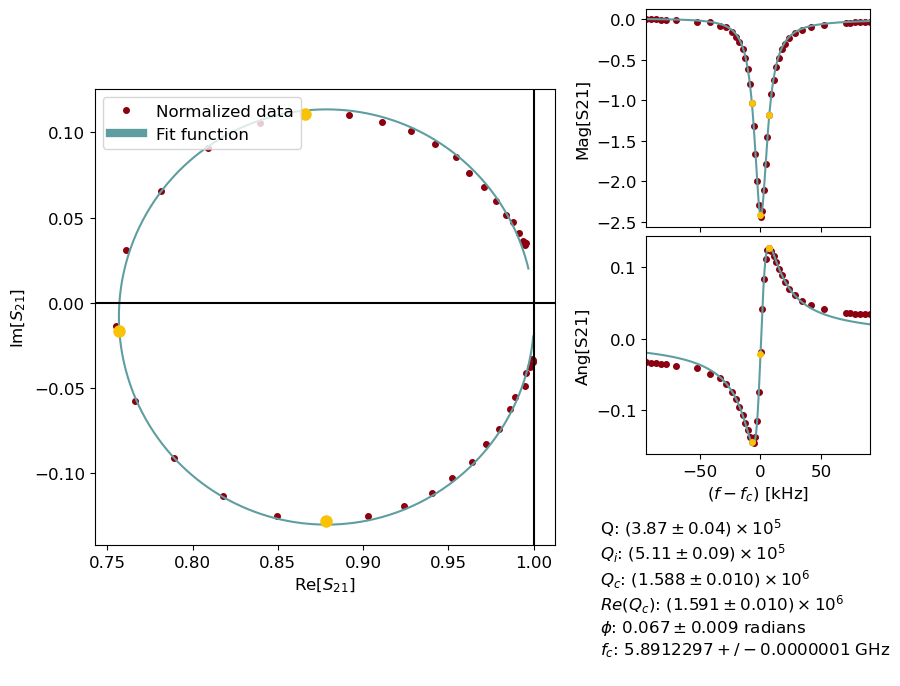

-30.0


/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Qc=1387667.0288923844) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=-0.16453398715715944 < 1e-05 at iteration 3 and prob(phi=-0.01611564716962205) = 0.30171546959556983 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=-0.1253786083902625 < 1e-05 at iteration 3 and prob(phi=-0.004028911792405512) = 0.3173510815135304 < max(sigmas)
  warn(errmsg)
/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/materials-software/scresonators/fit_resonator/../../scresonators/fit_resonator/fit.py:1046: RuntimeWarning: divide by zero encountered in scalar divide
  Qc_Re_pos = 1 / np.real(np.exp(1j * fit_params[3]) / ci["Qc"][2][1])


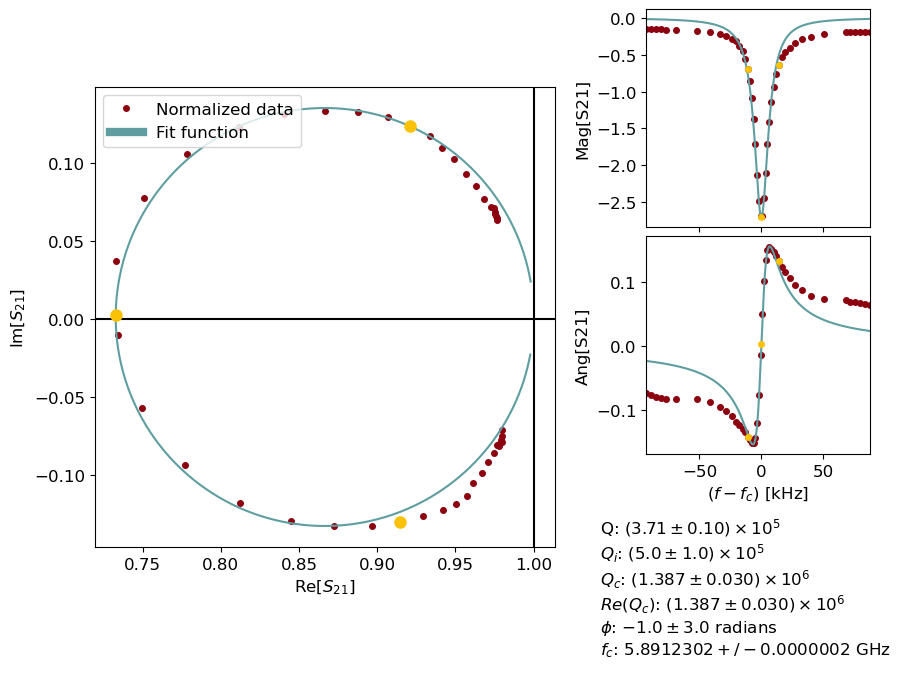

-30.0


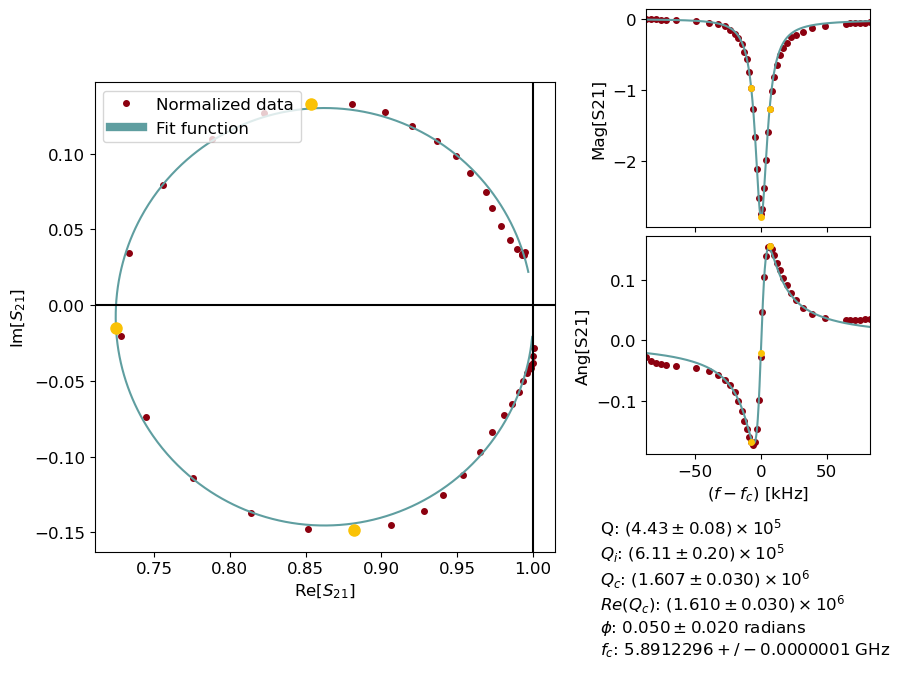

-30.0


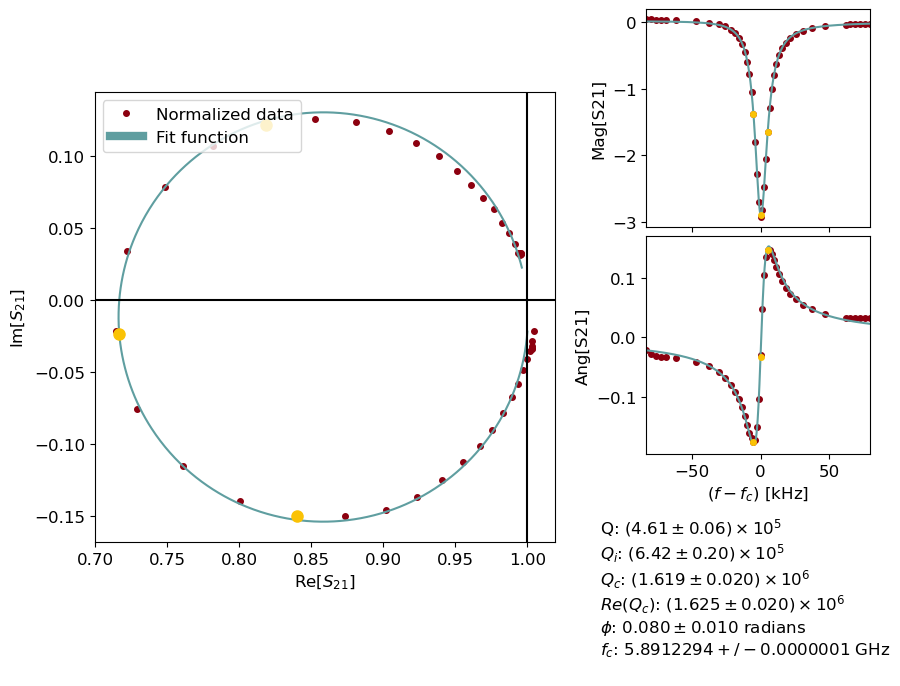

Time elapsed:  12.335505723953247
-30.0


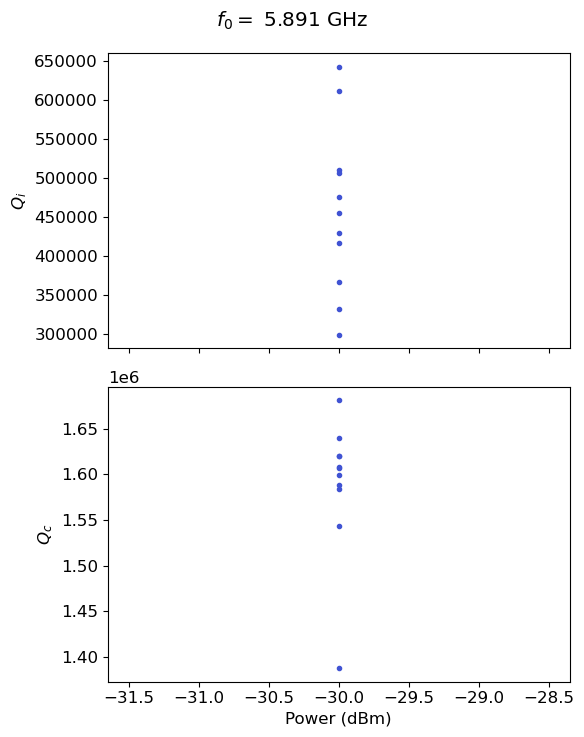

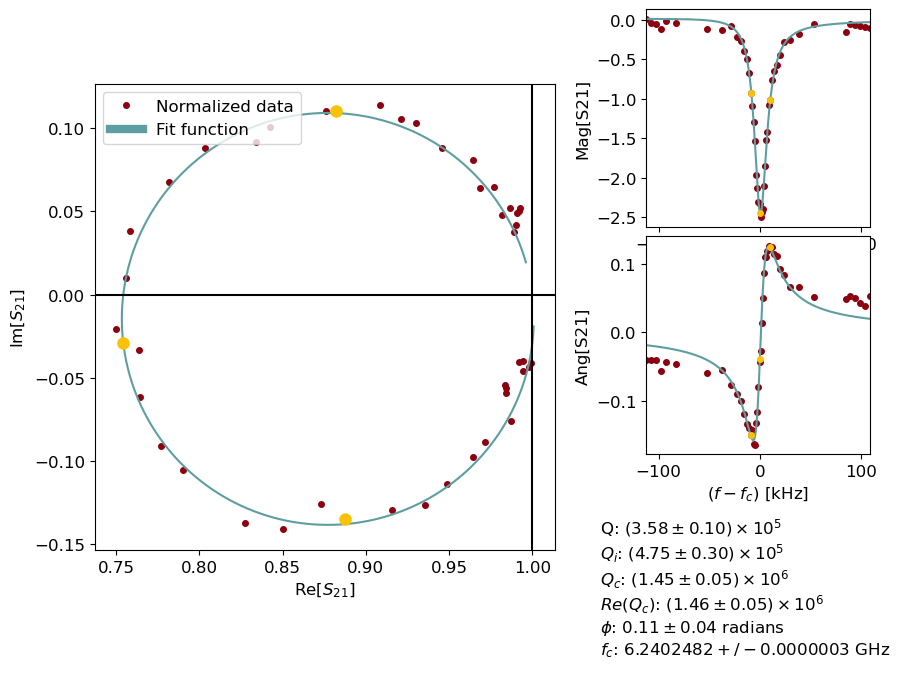

-30.0


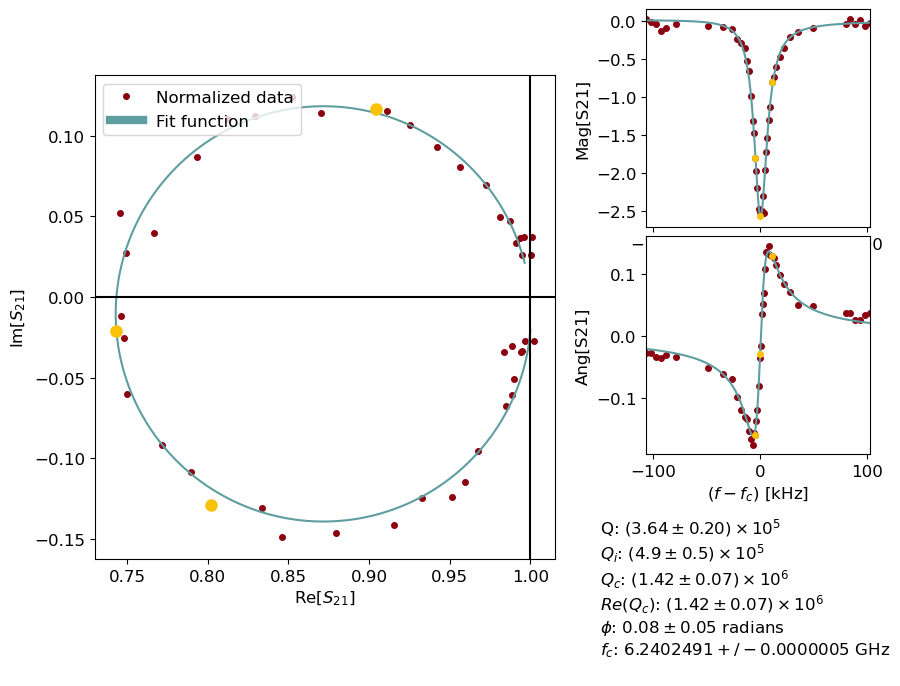

-30.0


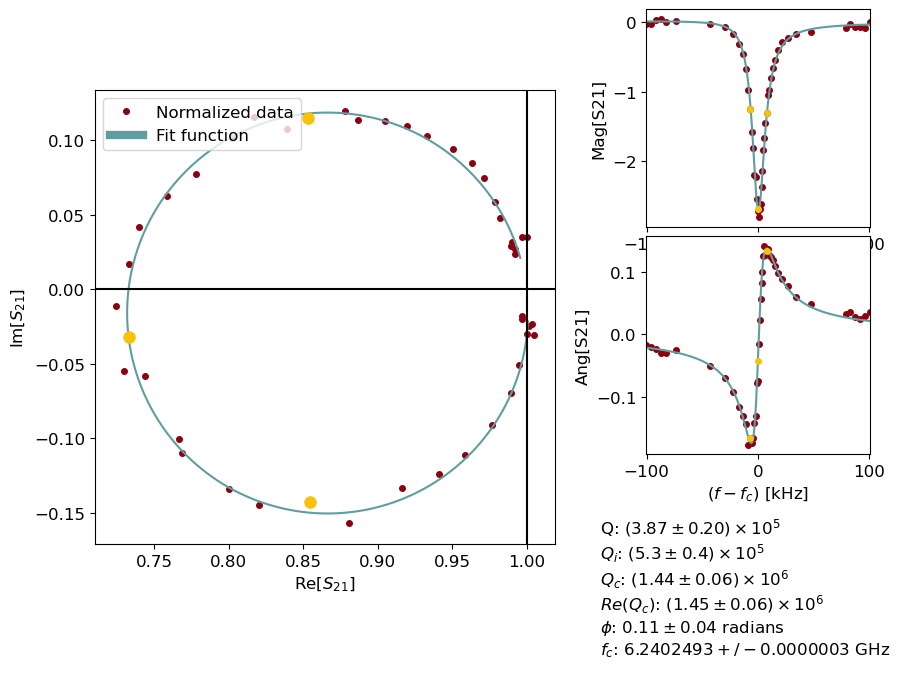

-30.0


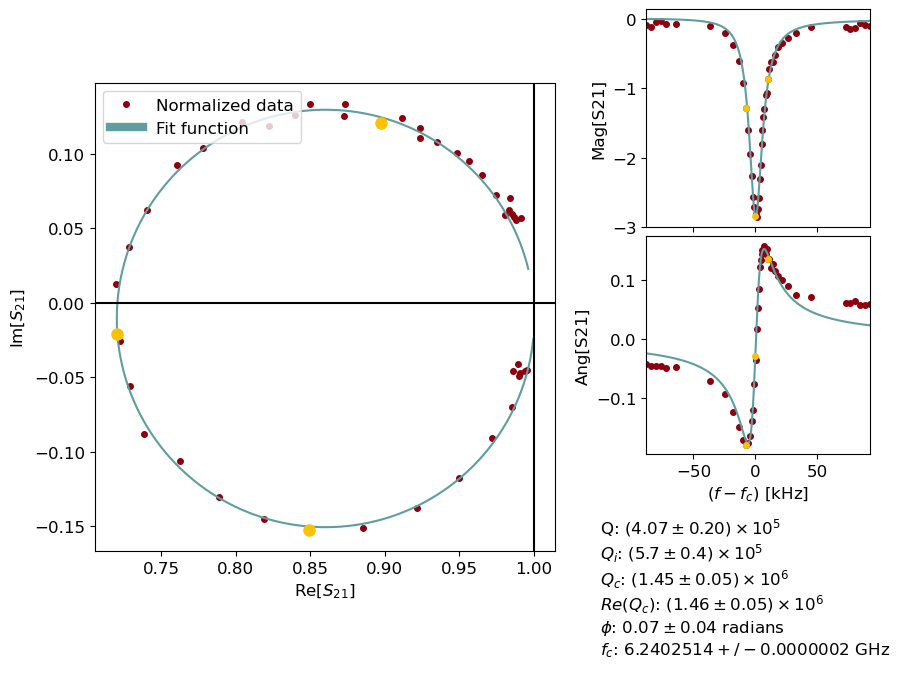

-30.0


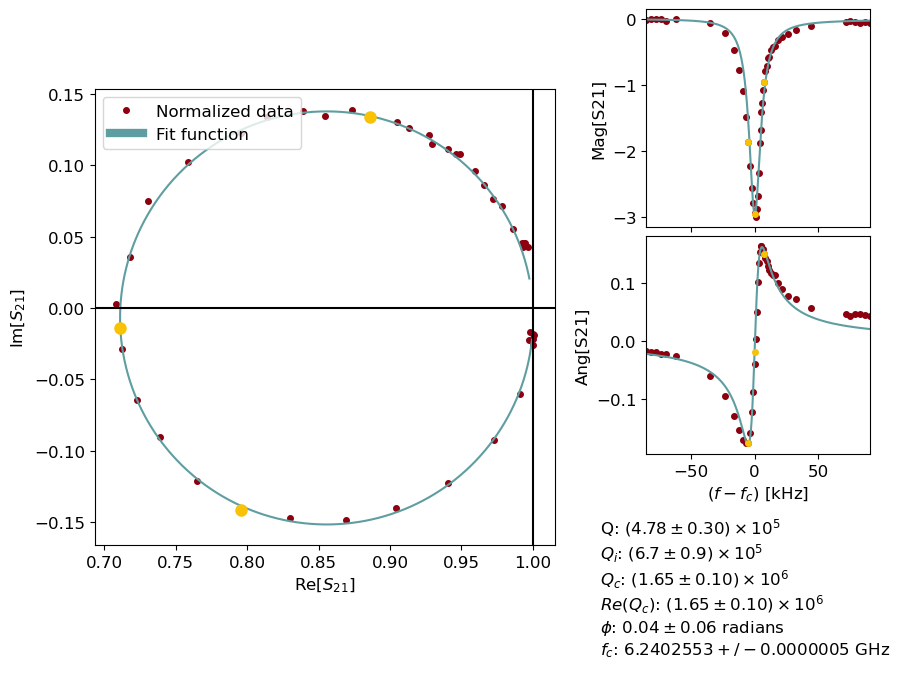

-30.0


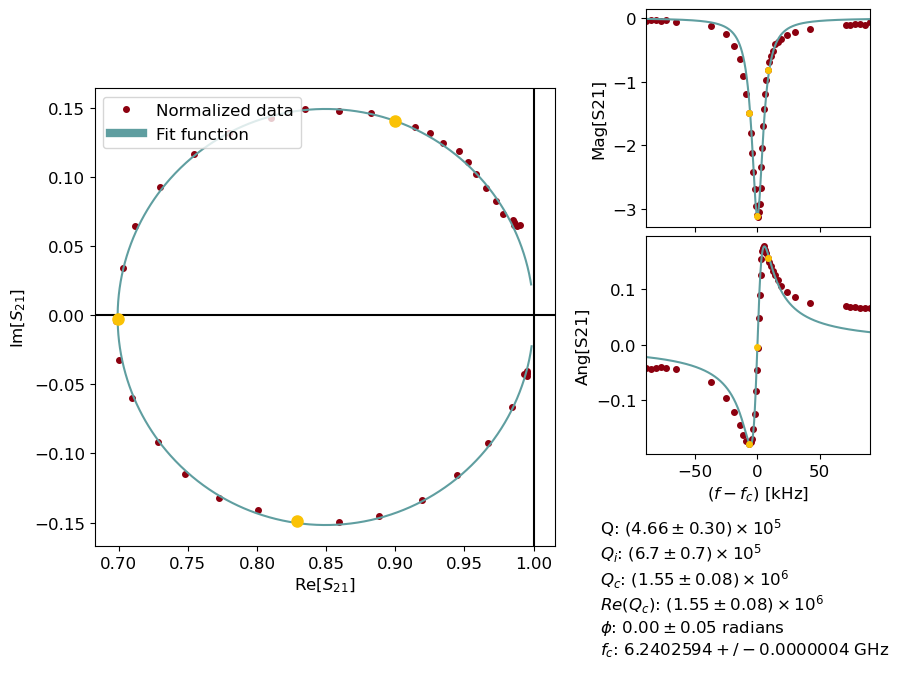

-30.0


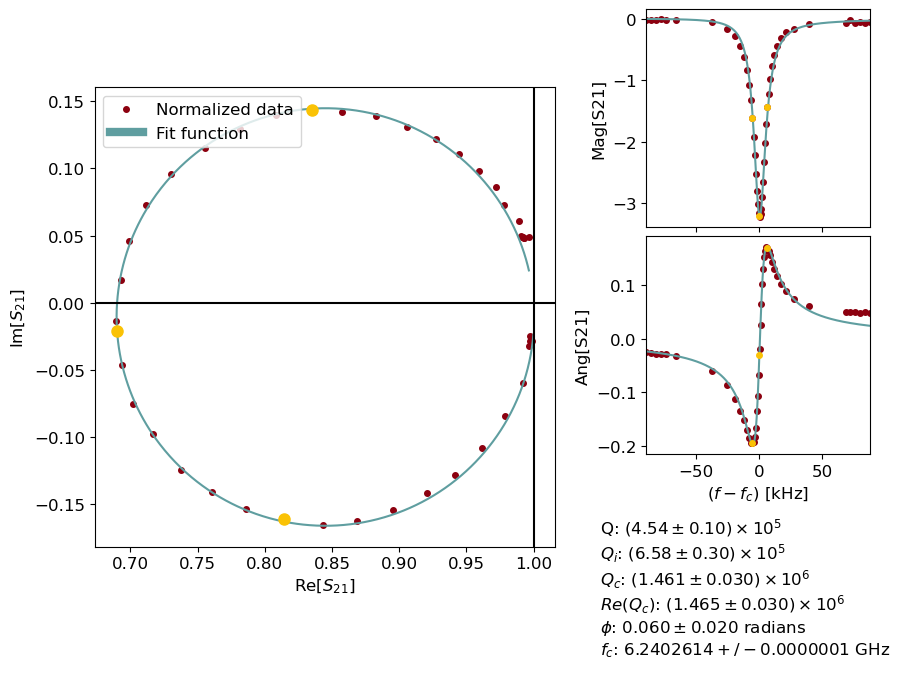

-30.0


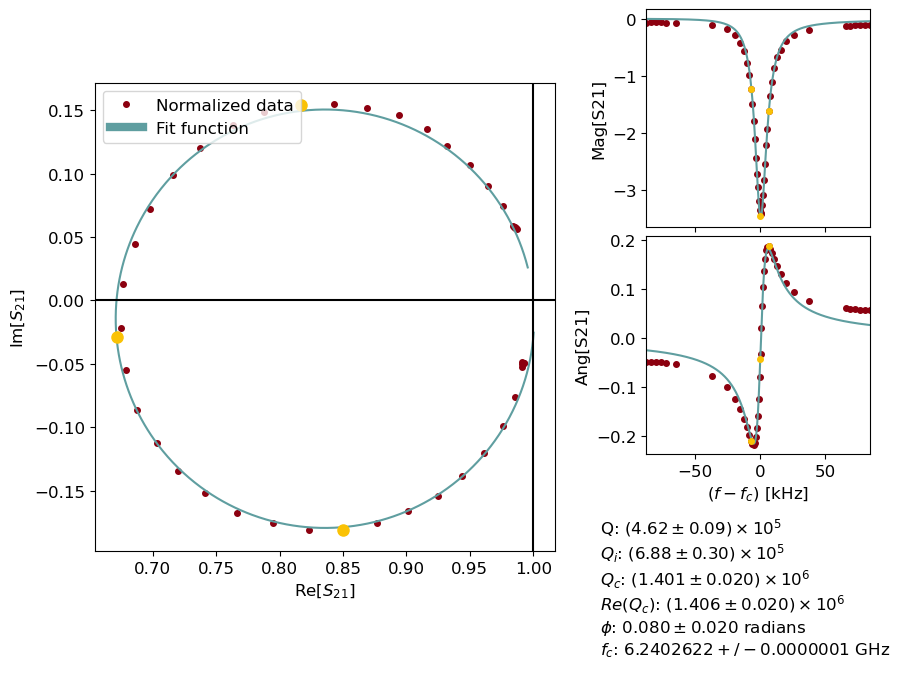

-30.0


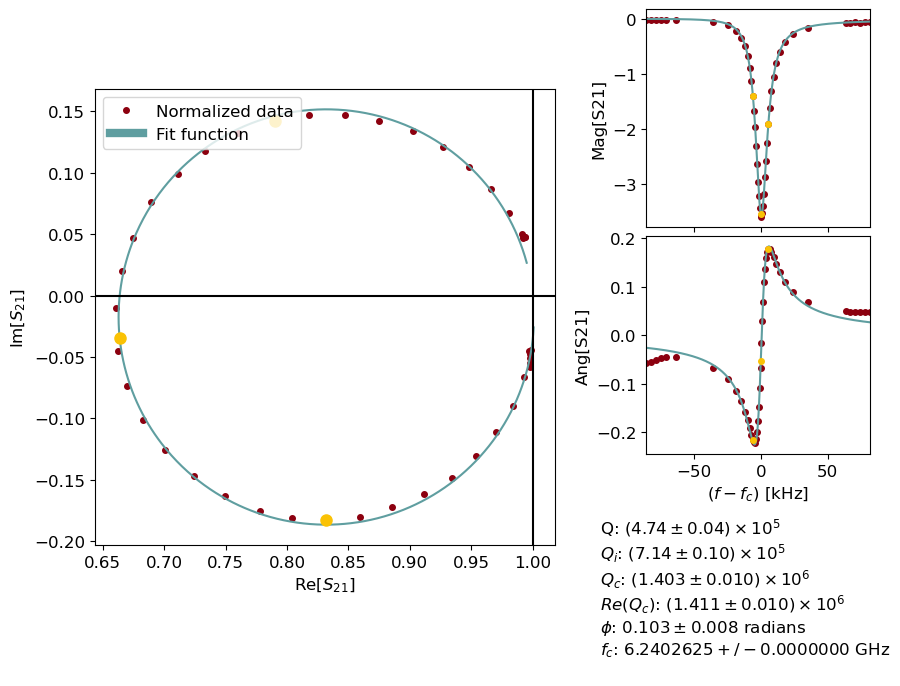

-30.0


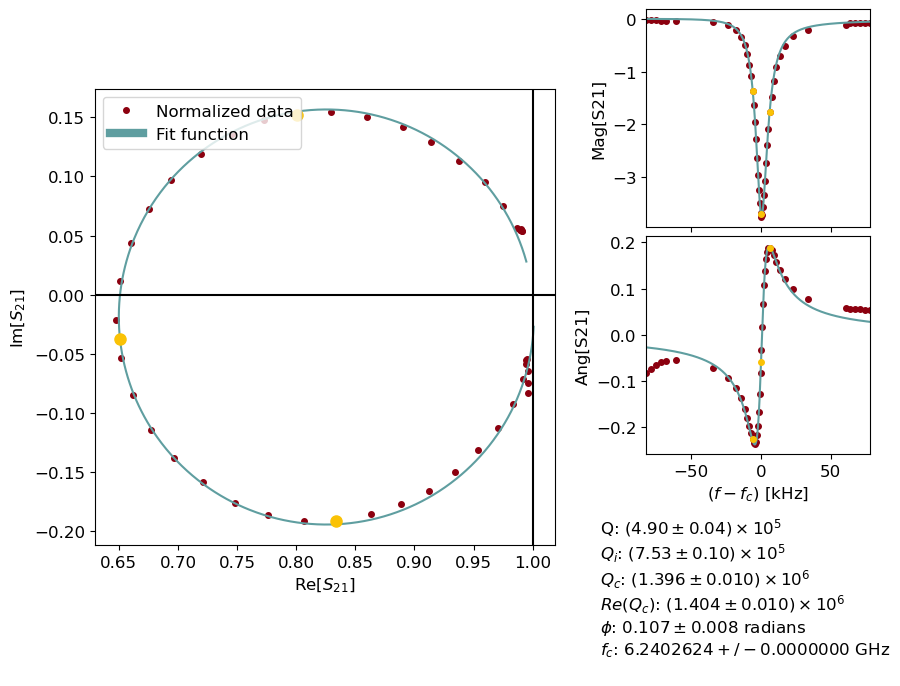

-30.0


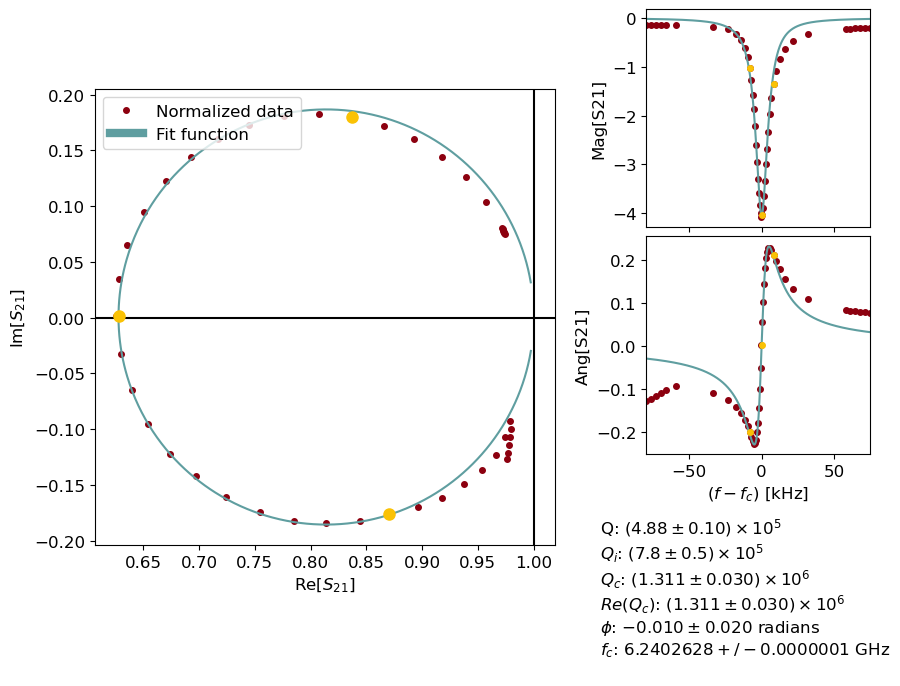

Time elapsed:  22.095278024673462
-30.0


/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Q=23422.84314877405) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Qc=76432.09080252776) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=-0.001967972452286946 < 1e-05 at iteration 31 and prob(phi=1.279363734806372) = 0.6129762589180202 < max(sigmas)
  warn(errmsg)
/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/materials-software/scresonators/fit_resonator/../../scresonators/fit_resonator/fit.py:1022: RuntimeWarning: divide by zero encountered in scalar power
  - (
/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/materials-software/scresonators/fit_resonator/../../scresonators/fit_resonator/fit.py:1045: RuntimeWarning: div

>Error when trying to write parameters on plot
>cannot convert float infinity to integer
-30.0
Qi is less than zero. Please make sure data is of correct format: decibals (log10*20 version), and radians. Otherwise, it is quite likely that the resonator being fit is not a Notch type resonator. Other types of resonators will not work with this code.


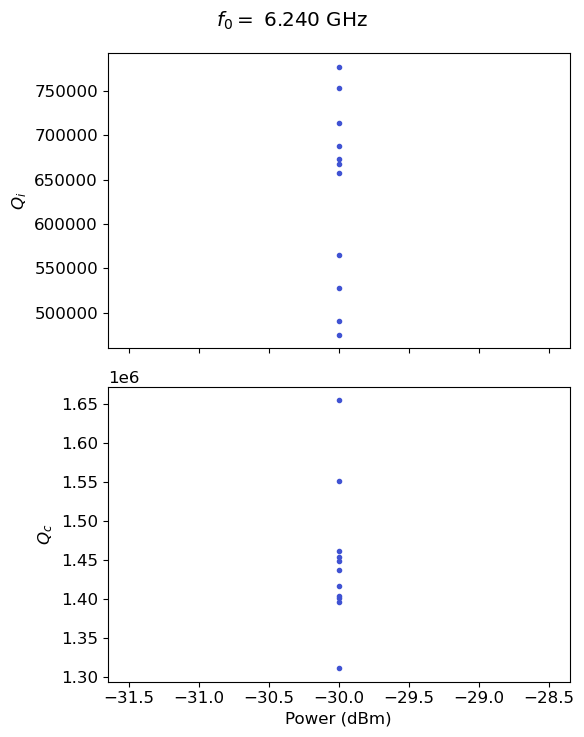

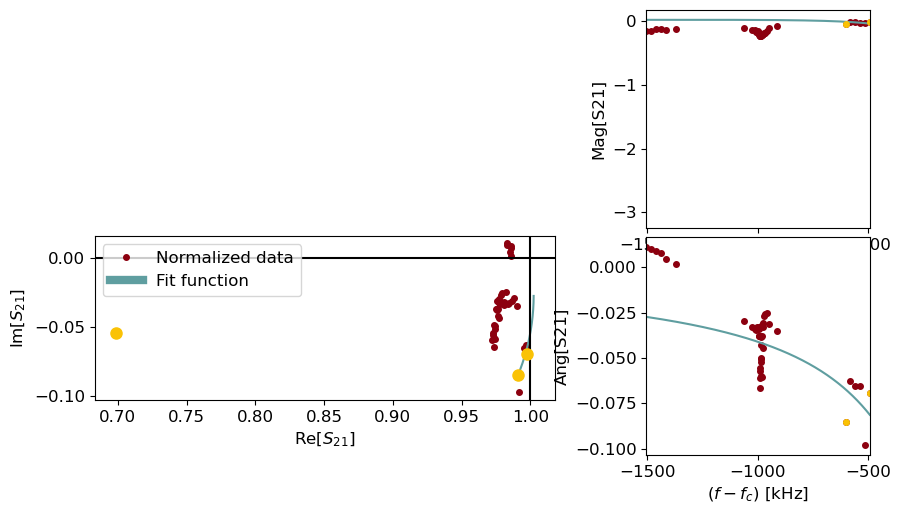

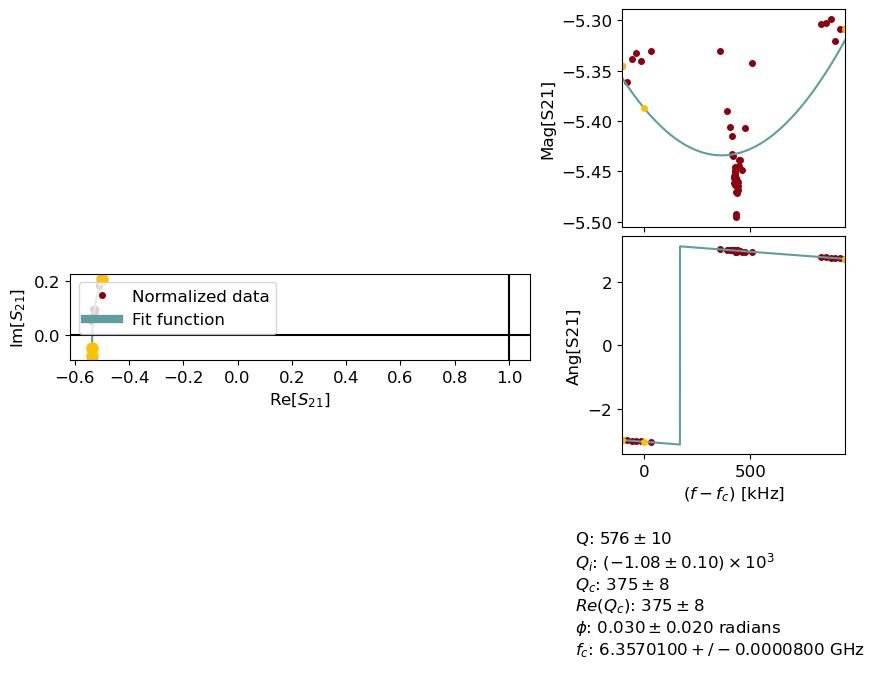

-30.0


/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Qc=6455151.52096064) = 0.9179070465137337 < max(sigmas)
  warn(errmsg)


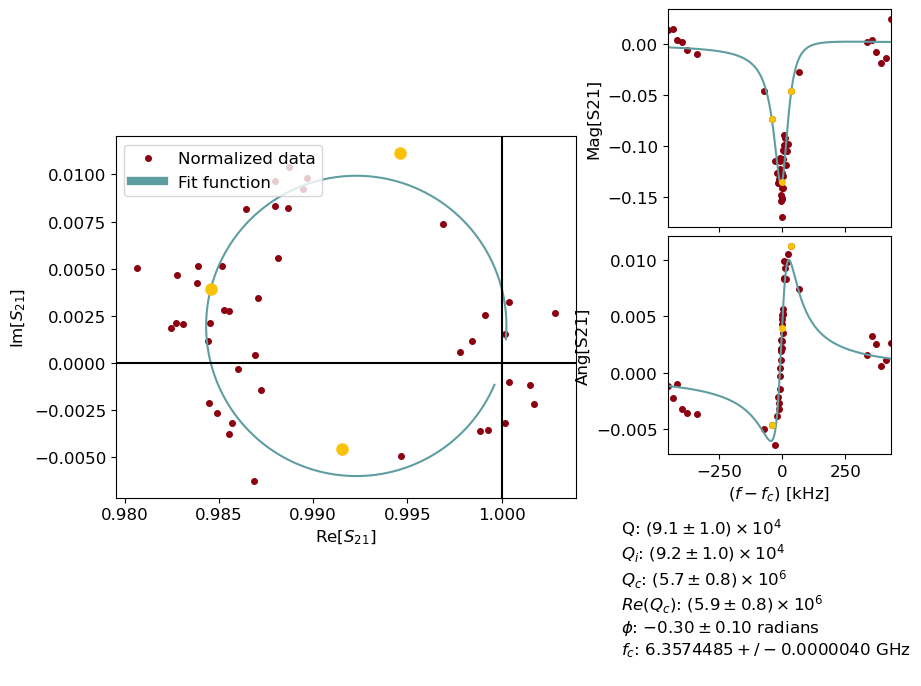

-30.0


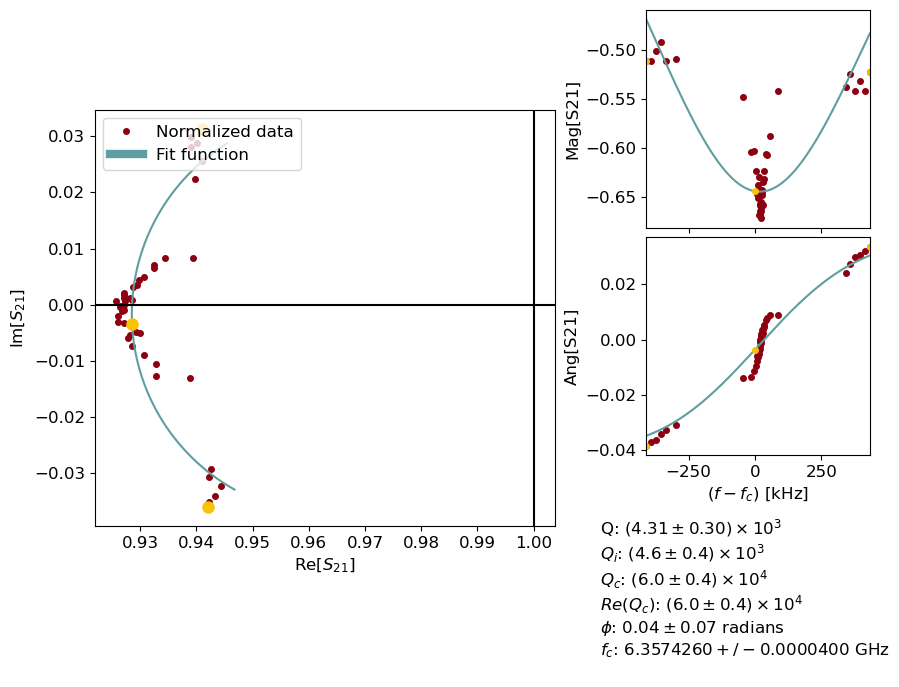

-30.0


/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Qc=823569.8528400061) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(phi=0.06265433486480851) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(phi=0.09398150229721278) = 0.0 < max(sigmas)
  warn(errmsg)


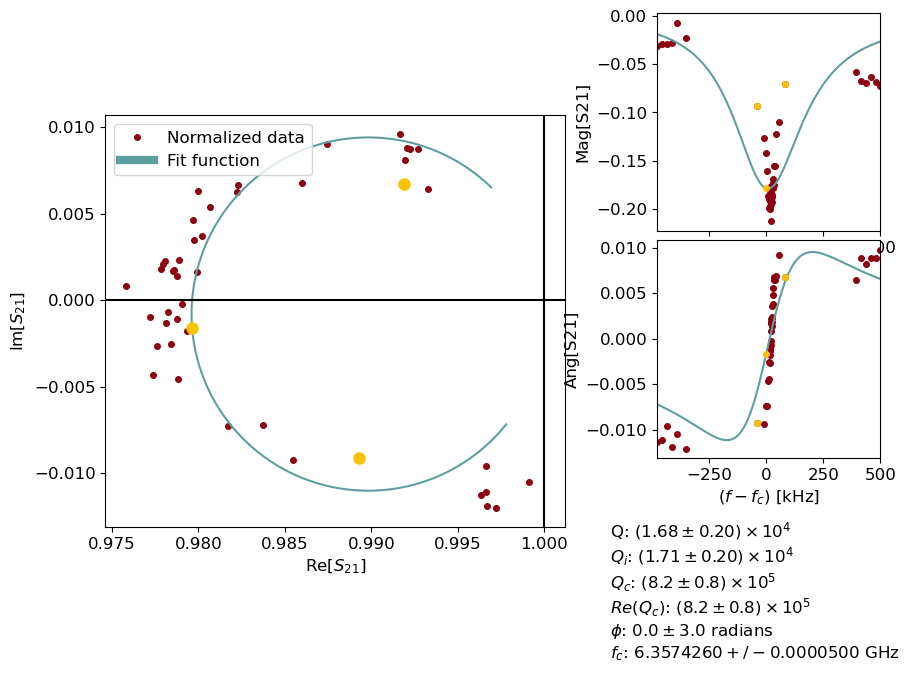

-30.0
attempt to get argmin of an empty sequence
>Failed to find initial guess for method DCM.  Please manually initialize a guess
An exception occurred: cannot access local variable 'init_guess' where it is not associated with a value
-30.0


/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Qc=1004113.6220343004) = 0.0 < max(sigmas)
  warn(errmsg)


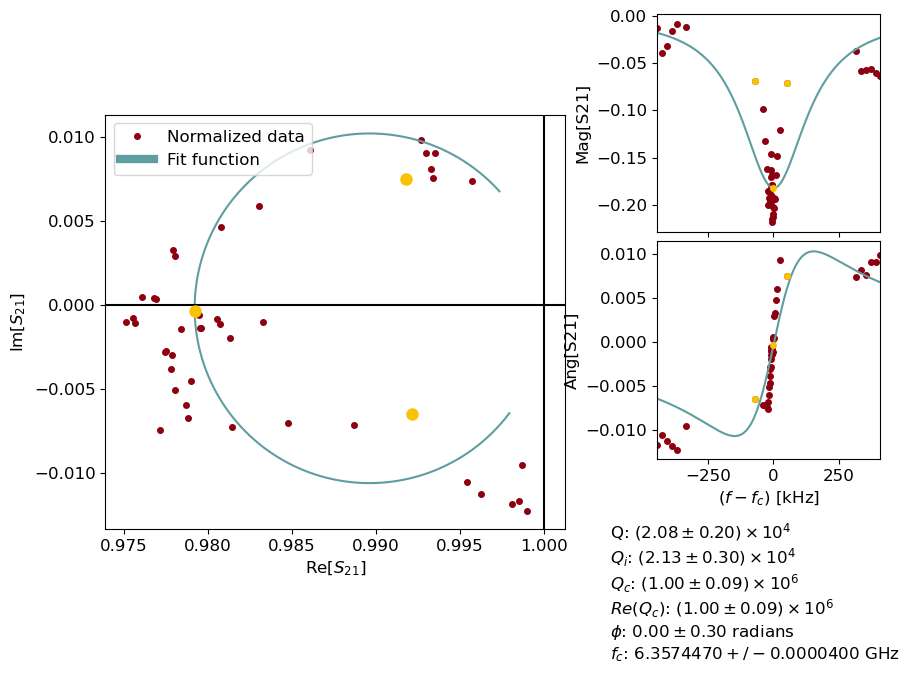

-30.0


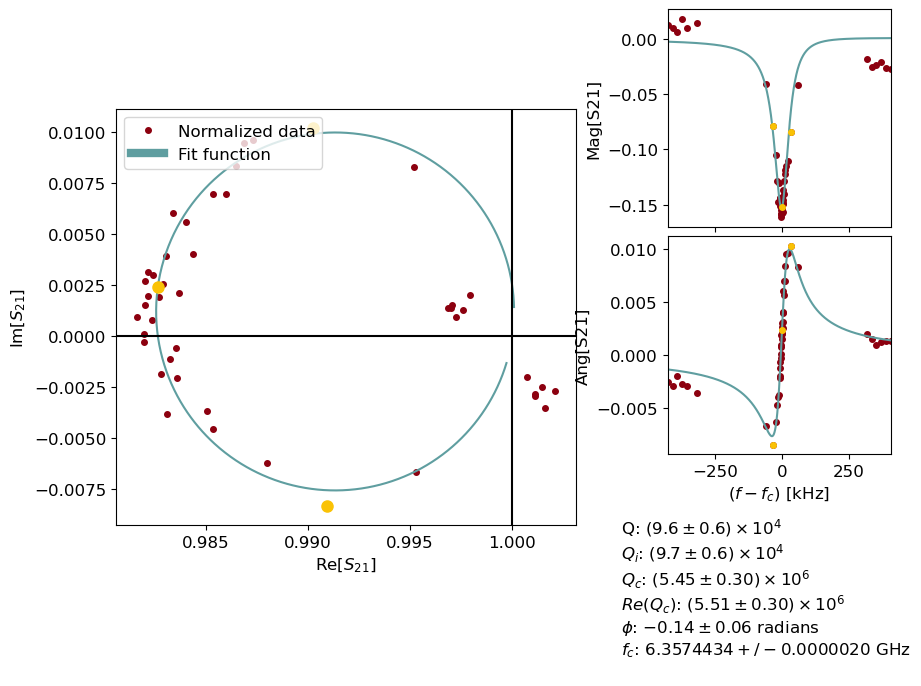

-30.0


/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Qc=1049746.8290808701) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(phi=-0.017253418955113033) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(phi=-0.011502279303408688) = 0.0 < max(sigmas)
  warn(errmsg)


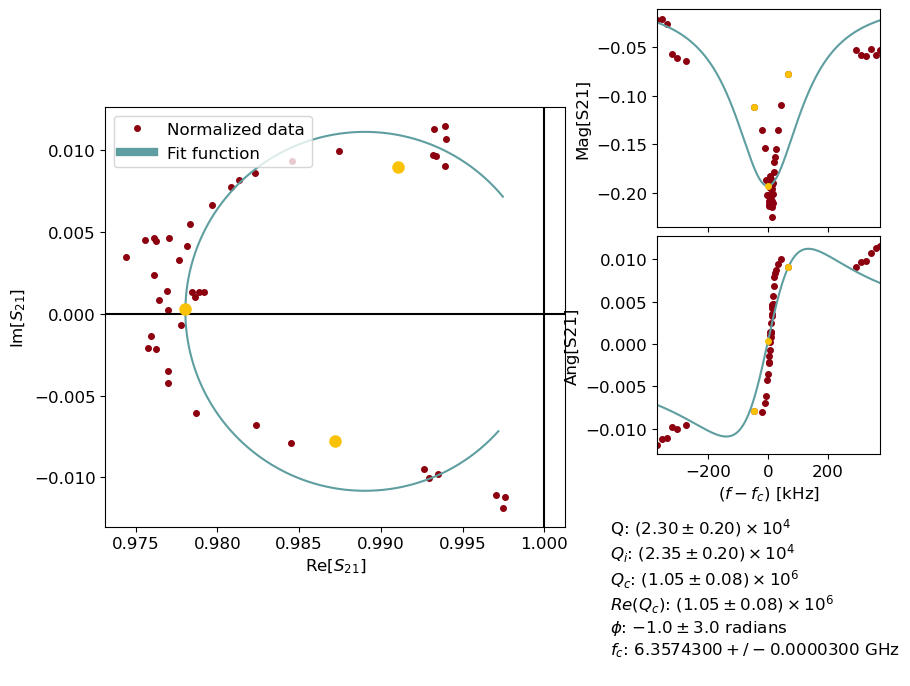

-30.0


/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Qc=5347899.592600776) = 0.0 < max(sigmas)
  warn(errmsg)


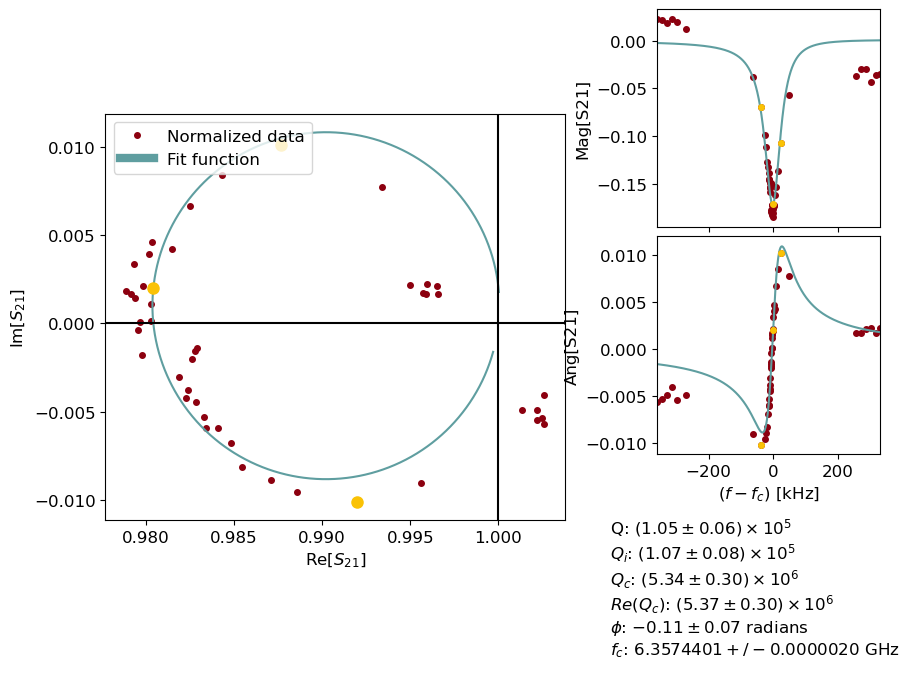

-30.0


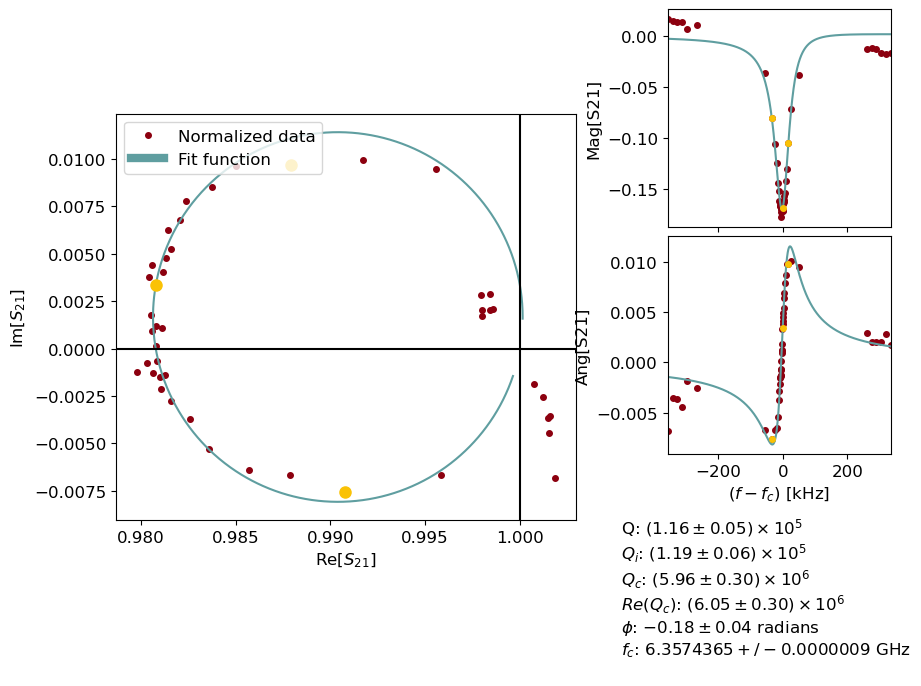

Time elapsed:  70.02471399307251
-30.0


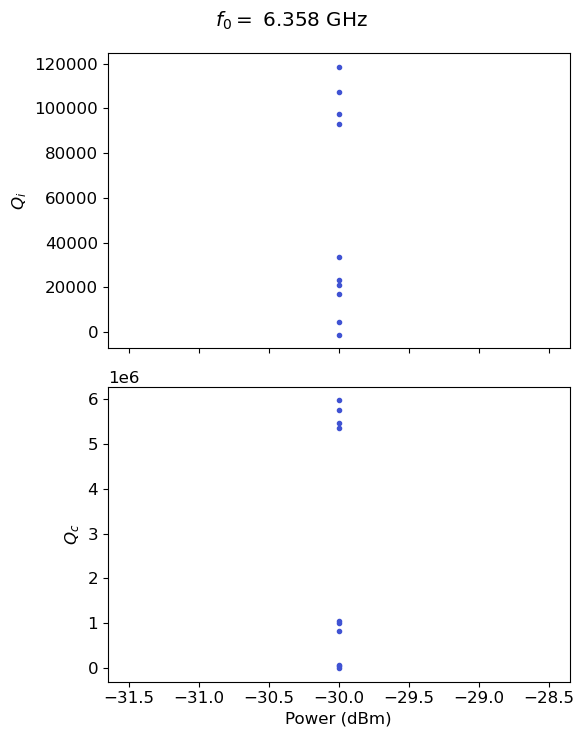

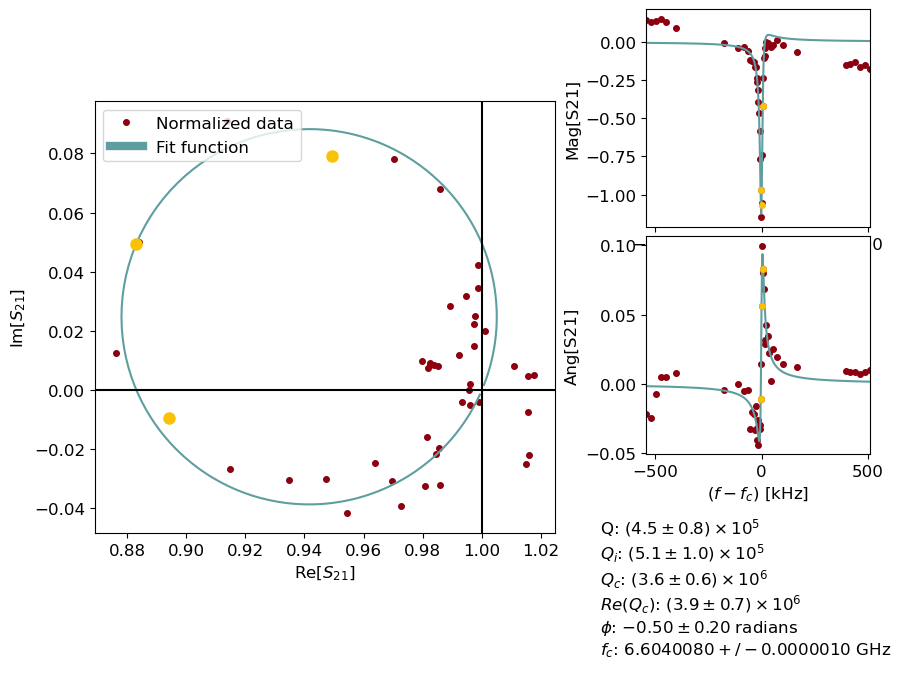

-30.0


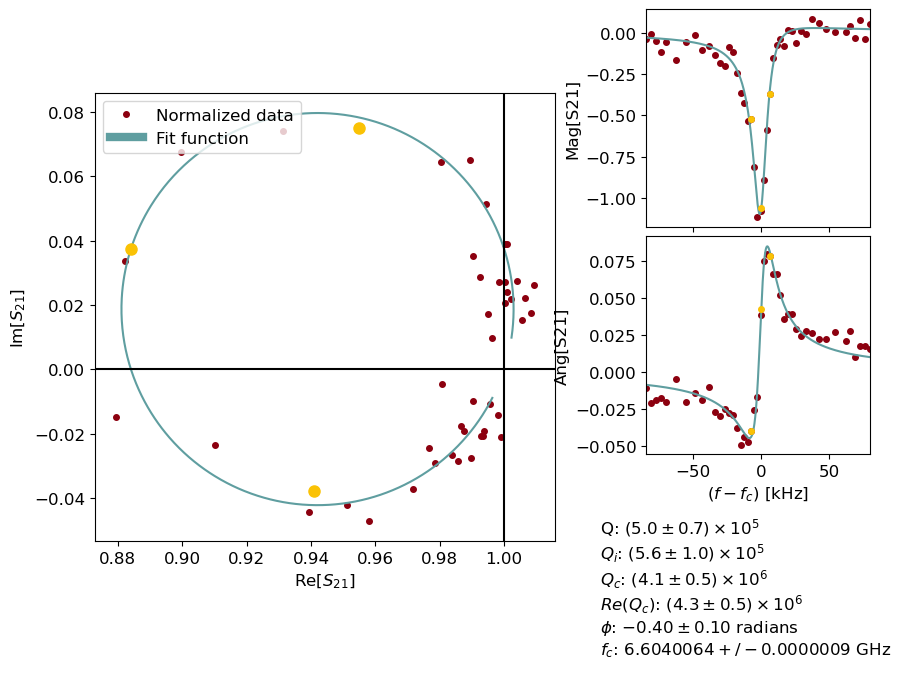

-30.0


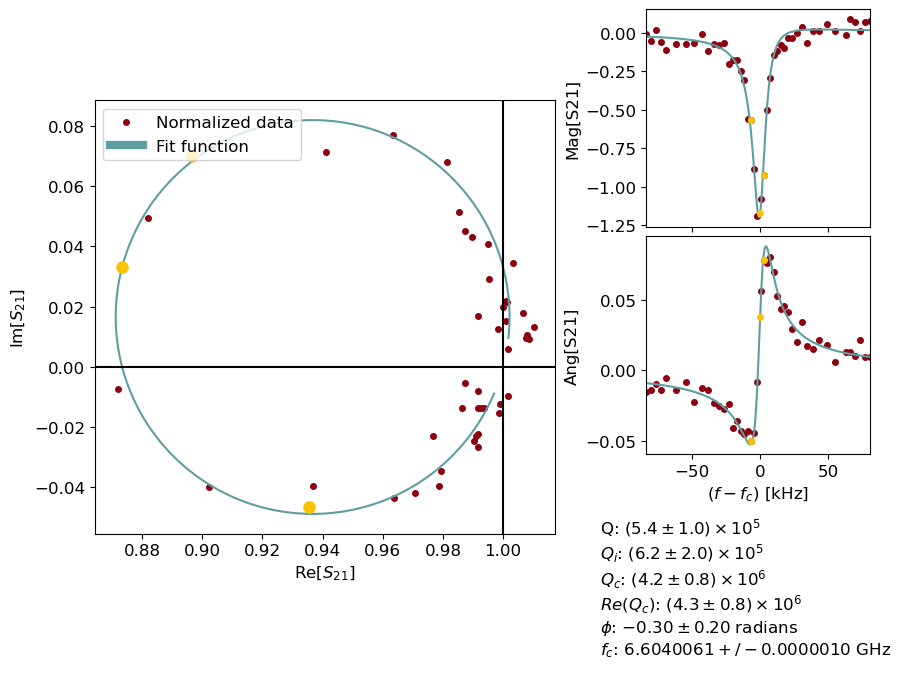

-30.0


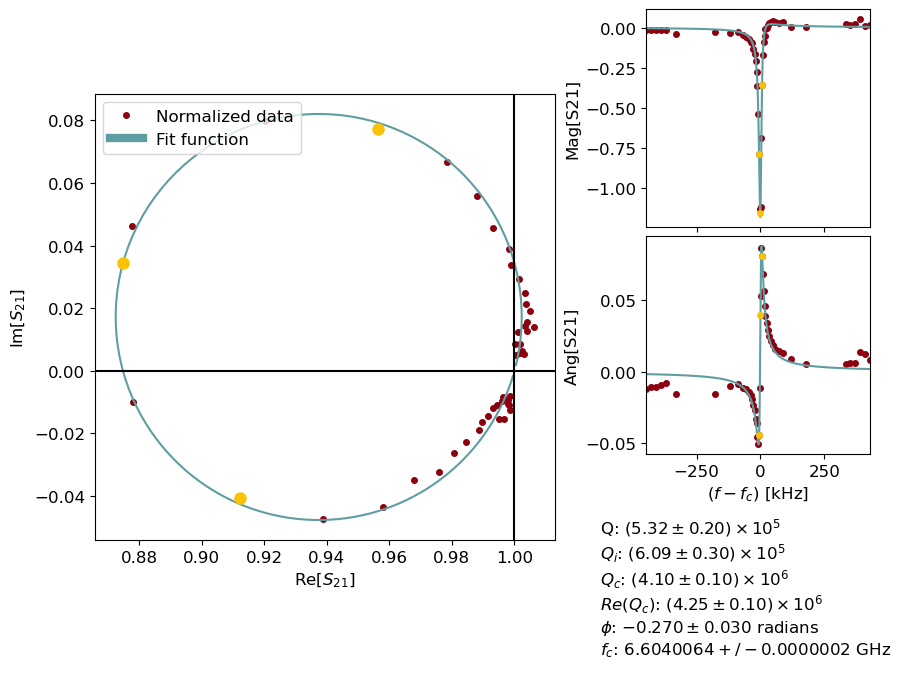

-30.0


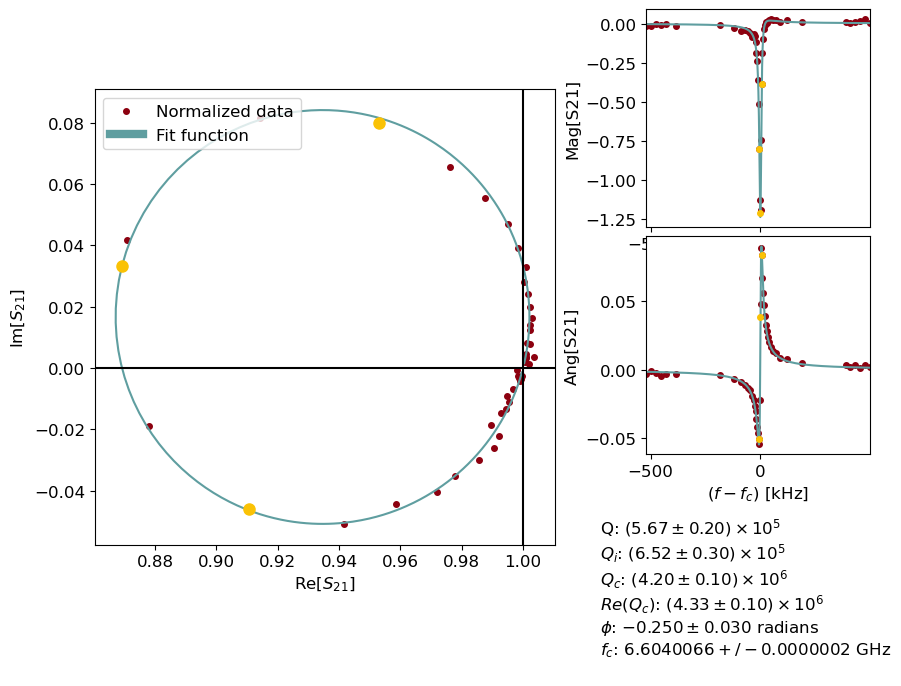

-30.0
Less than 5 Data points to fit data, not enough points near resonance, attempting to fit anyway


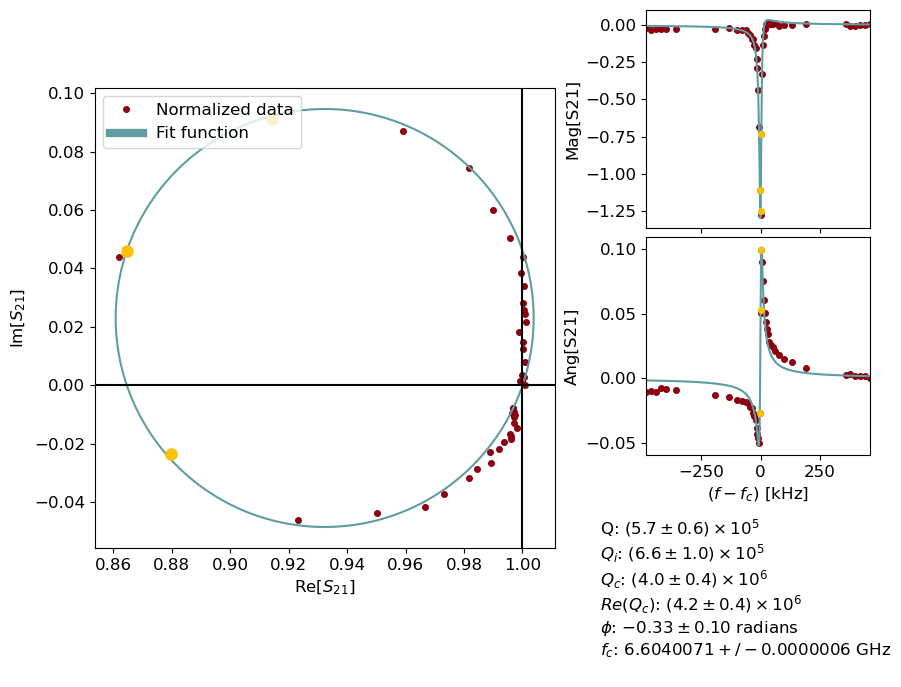

-30.0
Less than 5 Data points to fit data, not enough points near resonance, attempting to fit anyway


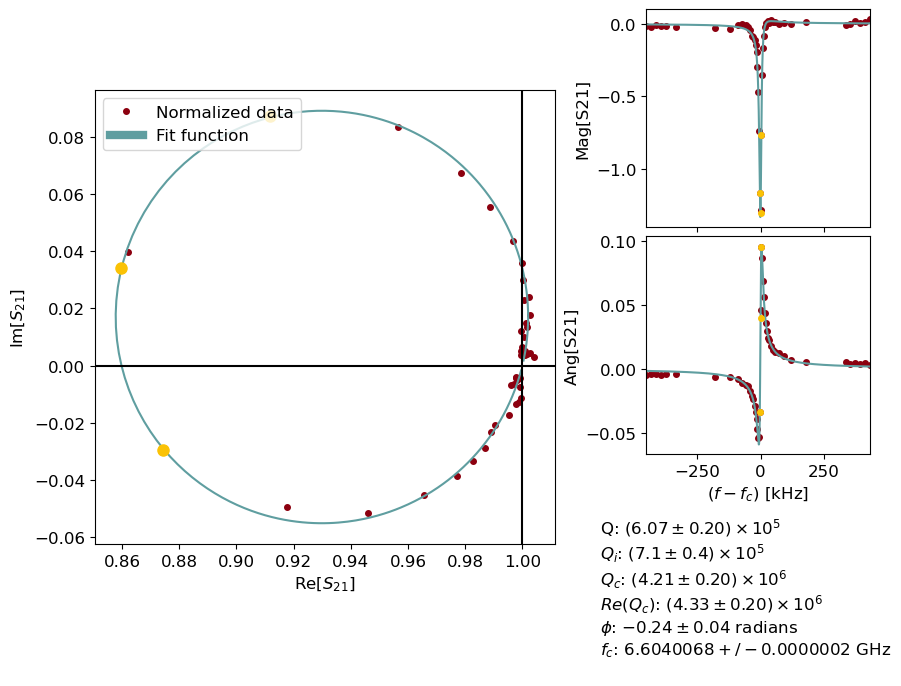

-30.0


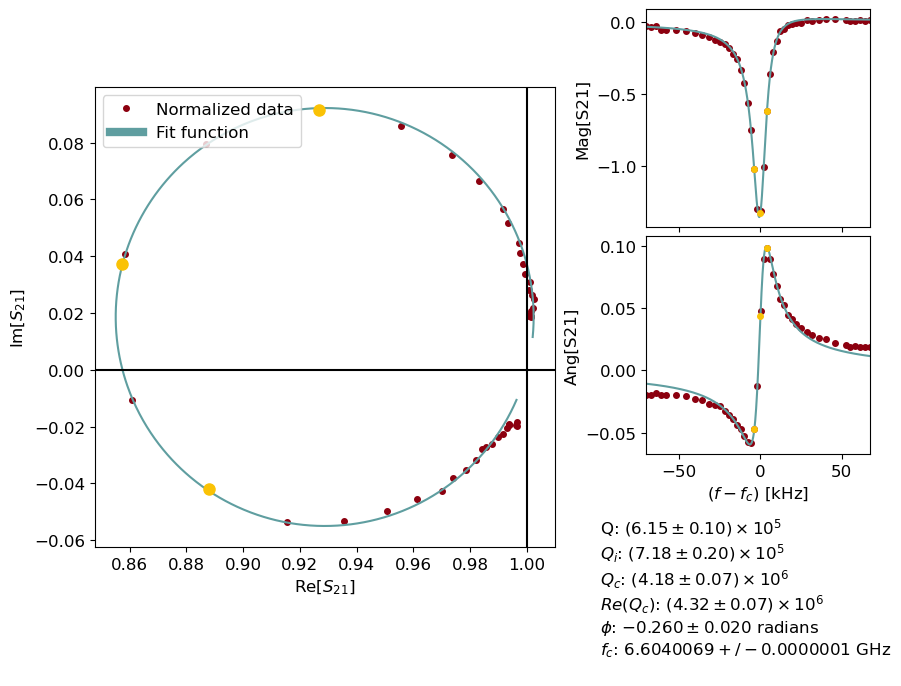

-30.0


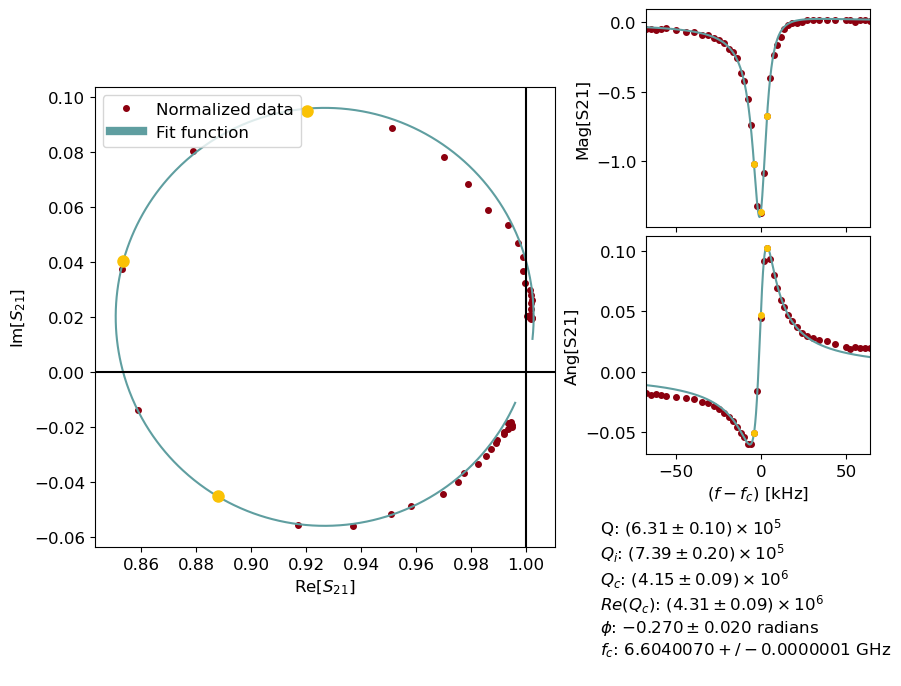

-30.0


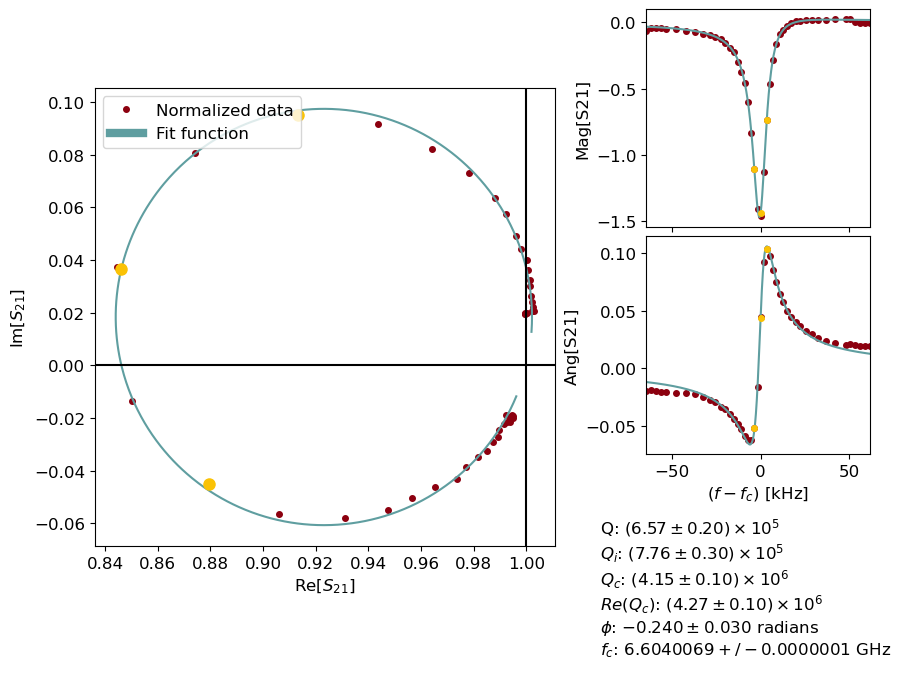

-30.0


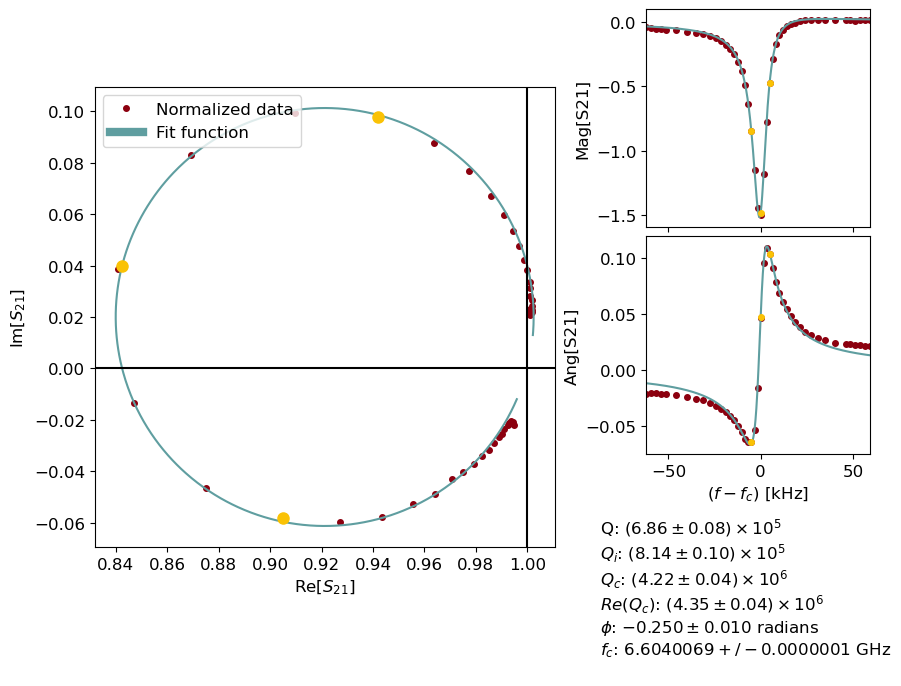

Time elapsed:  81.08578991889954
-30.0


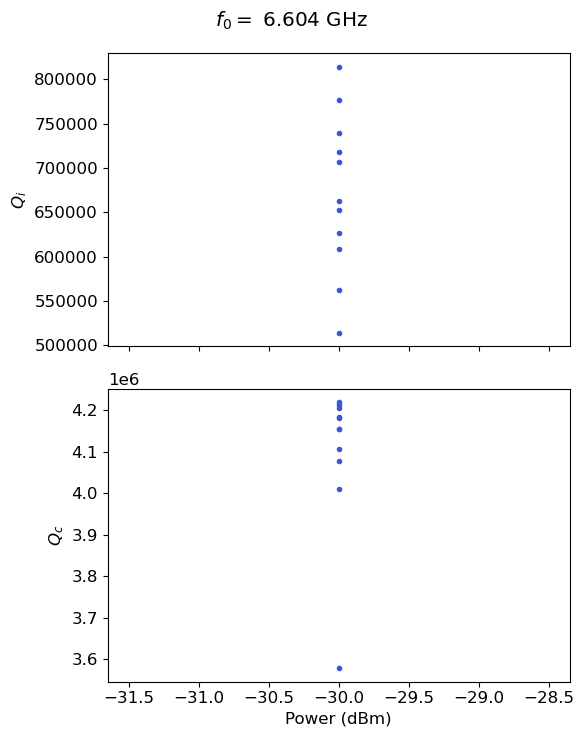

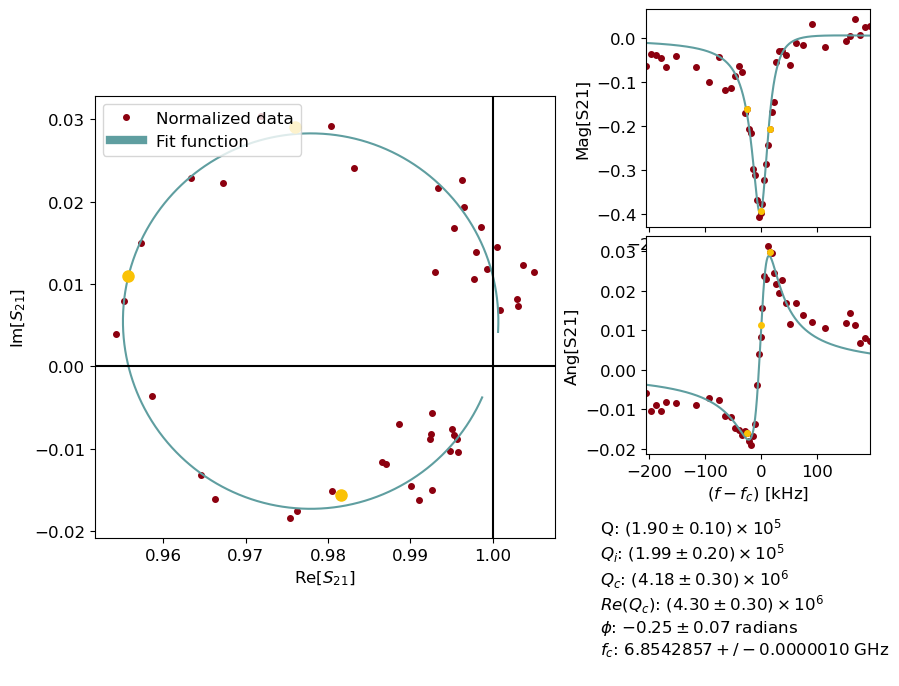

-30.0


/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Q=763.6462059249358) = 0.11737825993220644 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Q=5090.974706166238) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Qc=6640.570171051179) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Qc=19921.71051315354) = 0.31081272326788006 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=-0.7065219849921979 < 1e-05 at iteration 87 and prob(phi=0.34587135492458787) = 0.19752920169575294 < max(sigmas)
  warn(errmsg)
/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/mat

>Error when trying to write parameters on plot
>cannot convert float infinity to integer
-30.0


/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Qc=645265.7099882481) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(phi=-0.1384043502981229) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(phi=-0.09226956686541526) = 0.0 < max(sigmas)
  warn(errmsg)


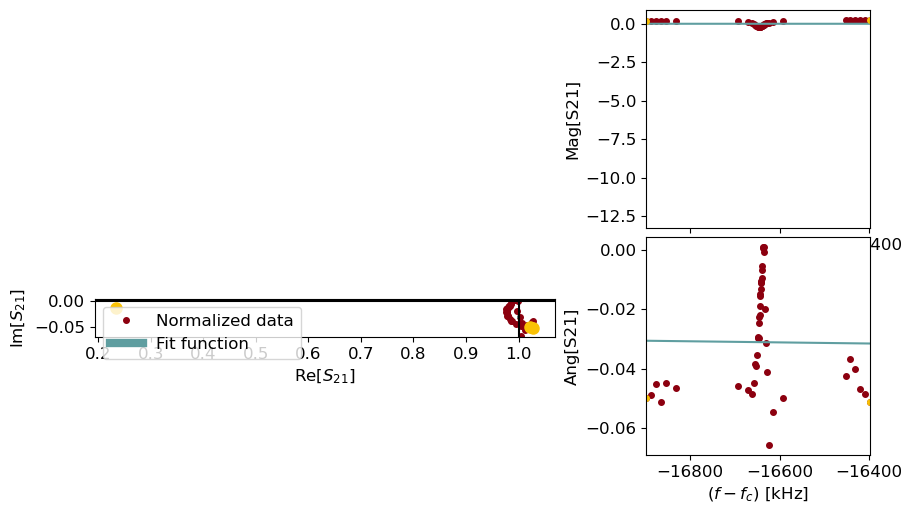

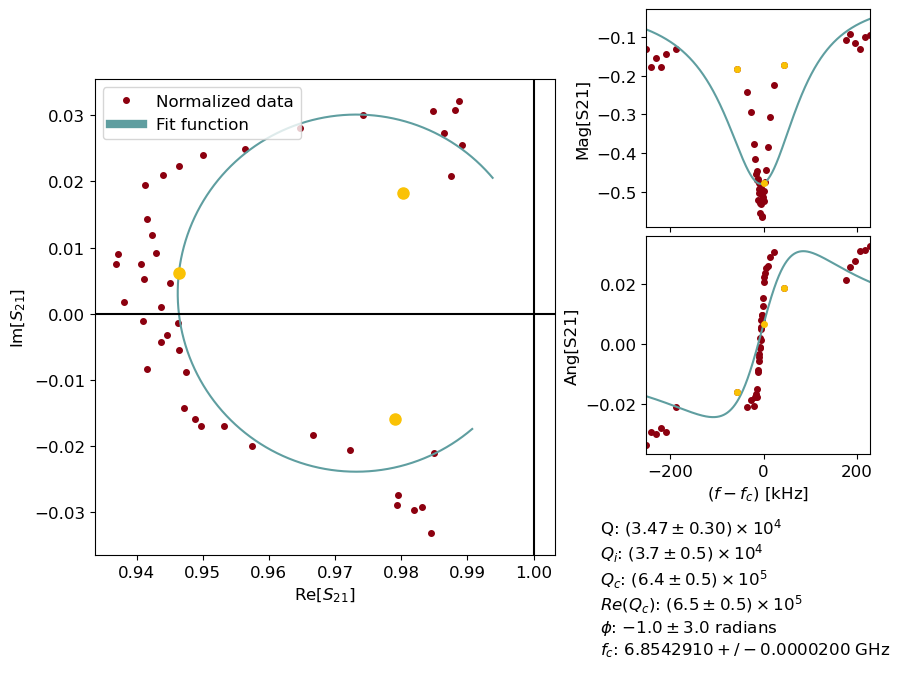

-30.0


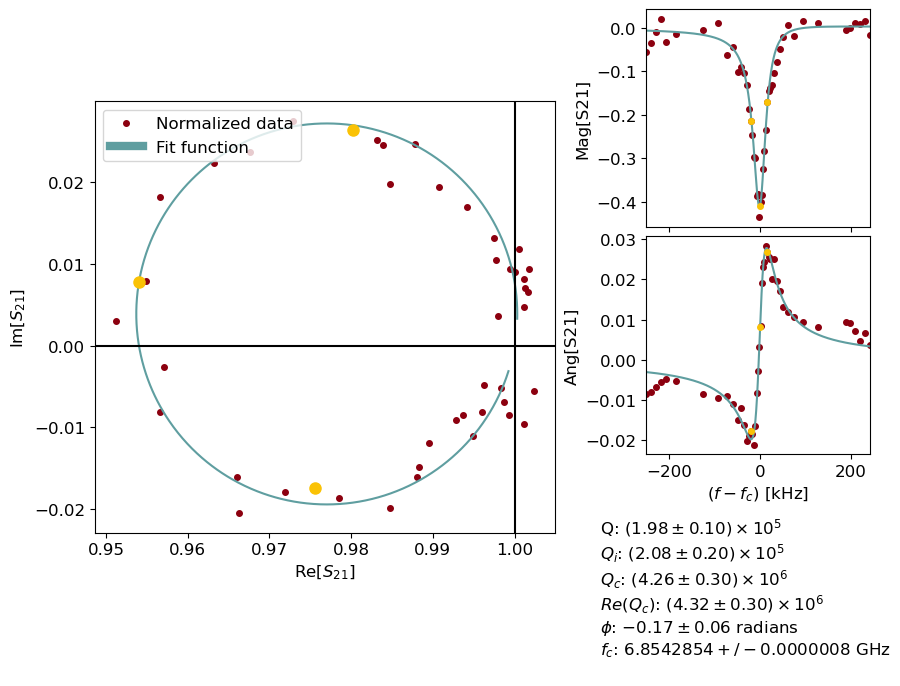

-30.0


/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Qc=56490.675572038956) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=-0.5106370627500365 < 1e-05 at iteration 2 and prob(phi=-0.2343971390191137) = 0.12974519409885815 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=-0.5108108823916967 < 1e-05 at iteration 2 and prob(phi=-0.10045591672247728) = 0.12985622804574995 < max(sigmas)
  warn(errmsg)


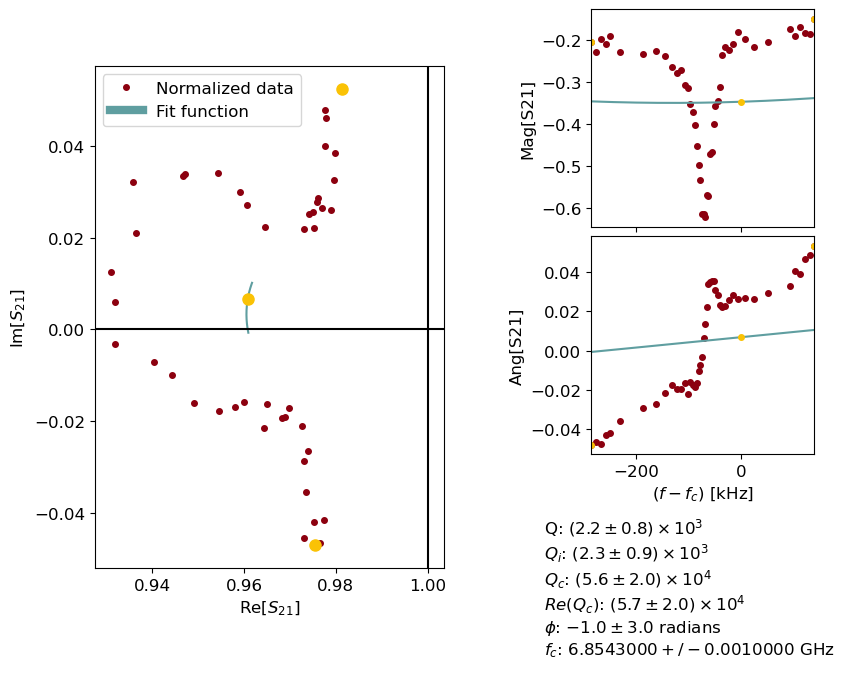

-30.0


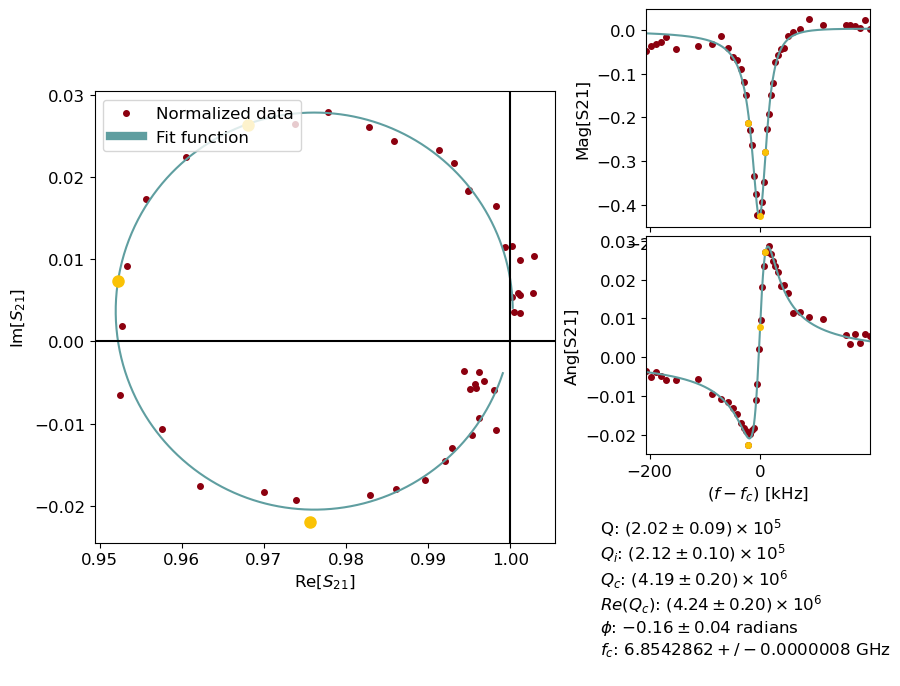

-30.0


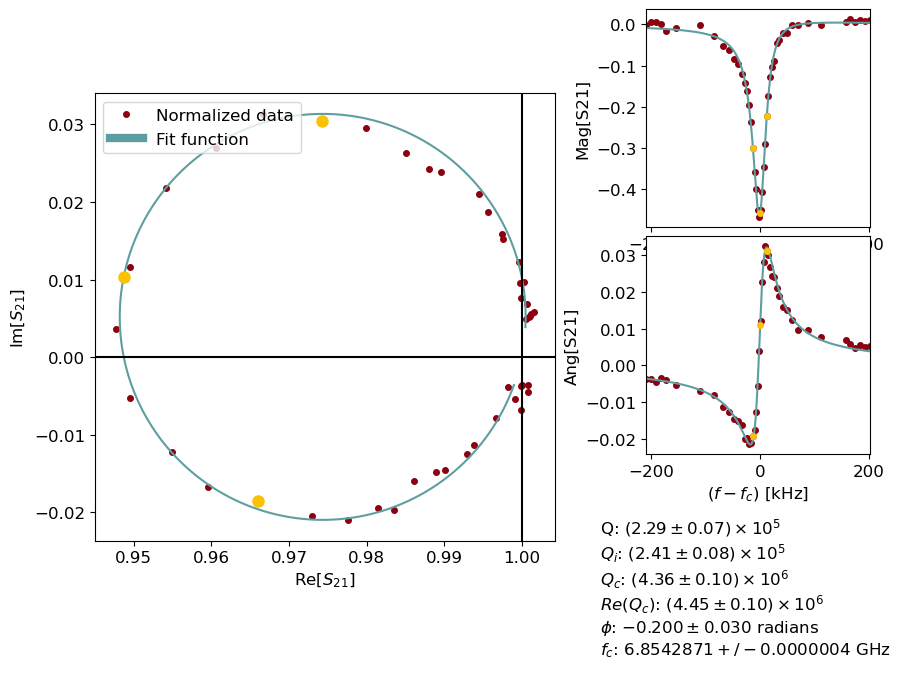

-30.0


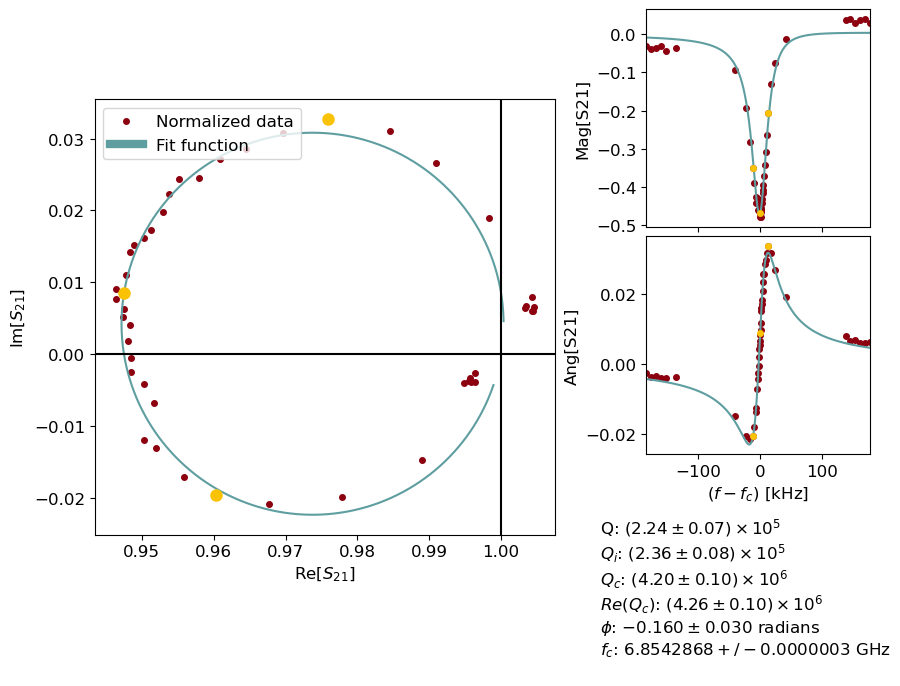

-30.0


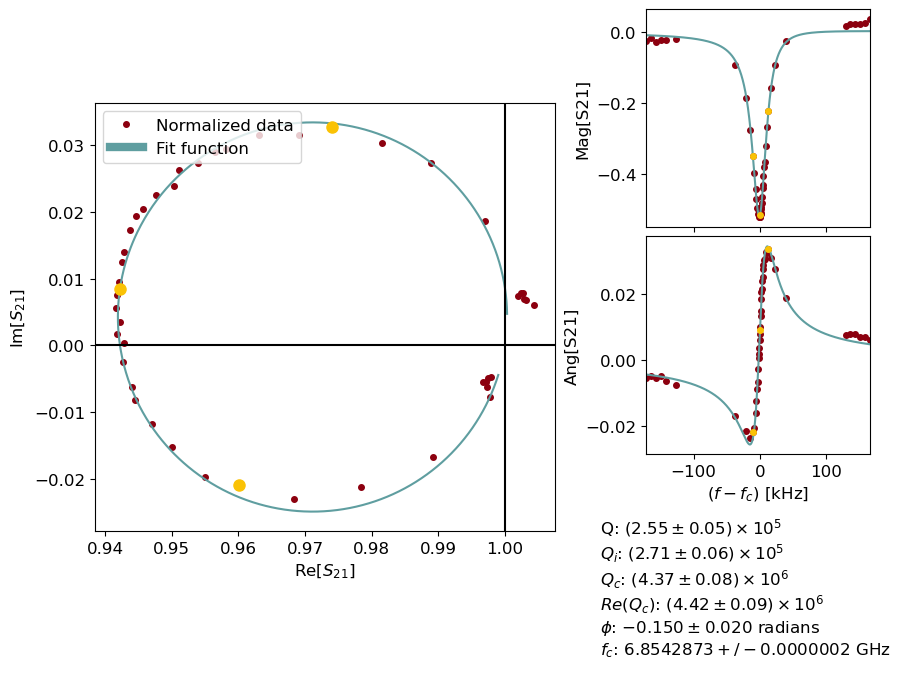

-30.0


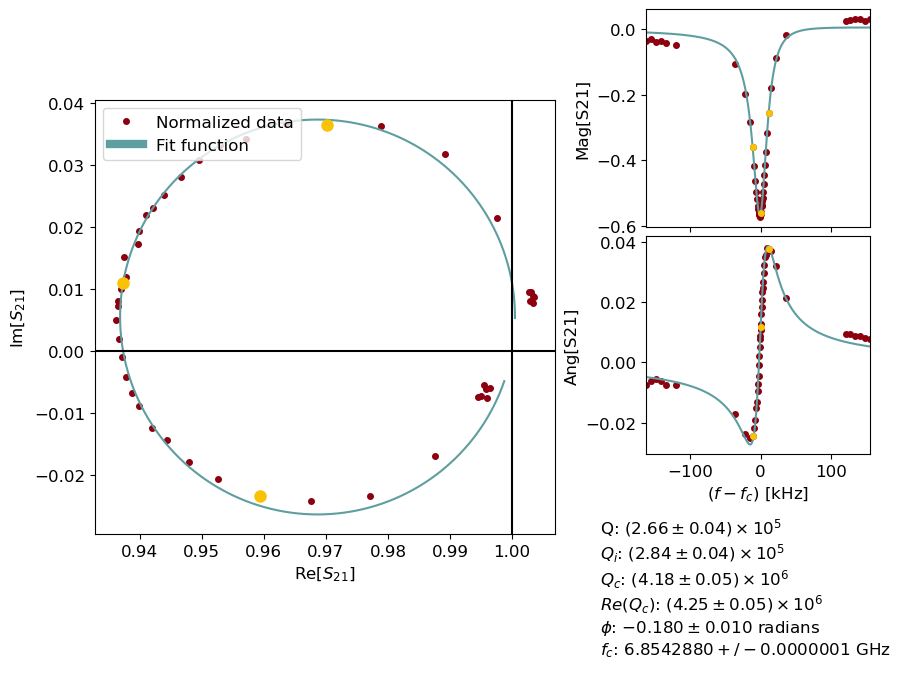

Time elapsed:  112.97191381454468
-30.0


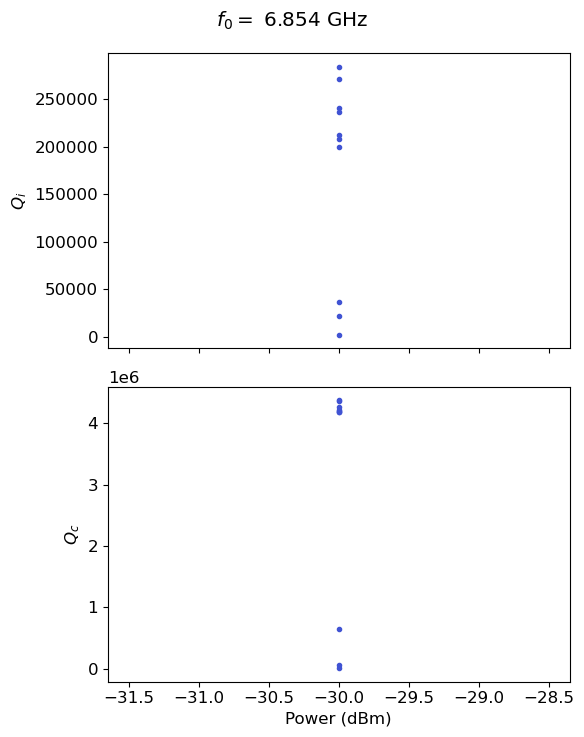

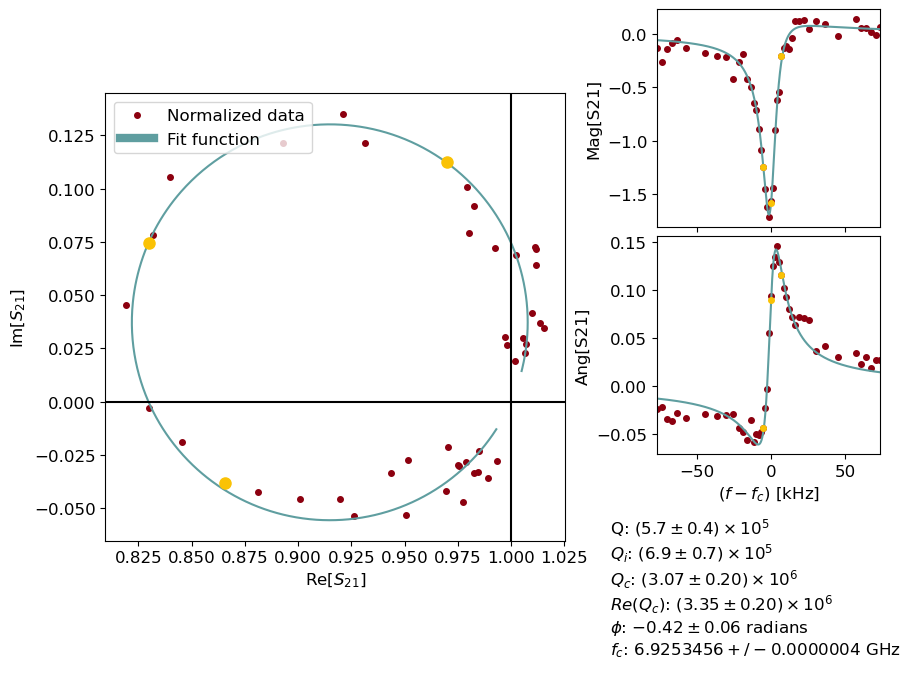

-30.0


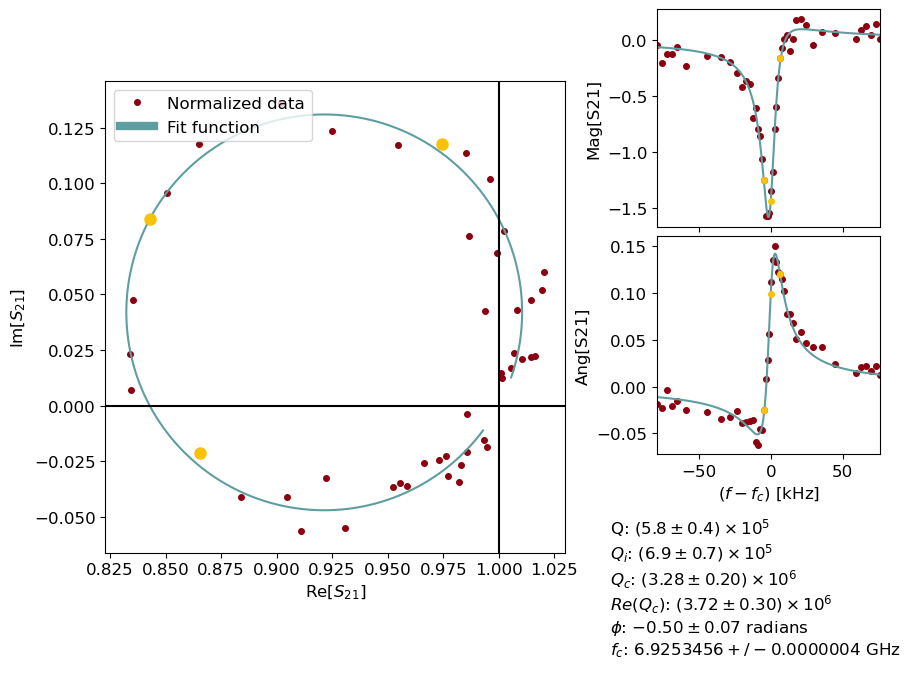

-30.0


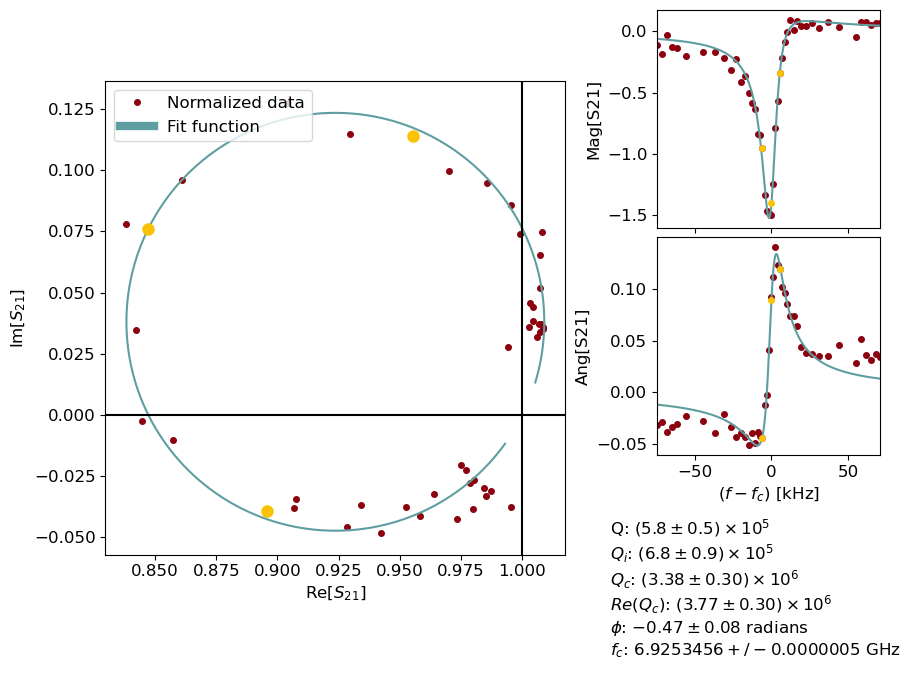

-30.0


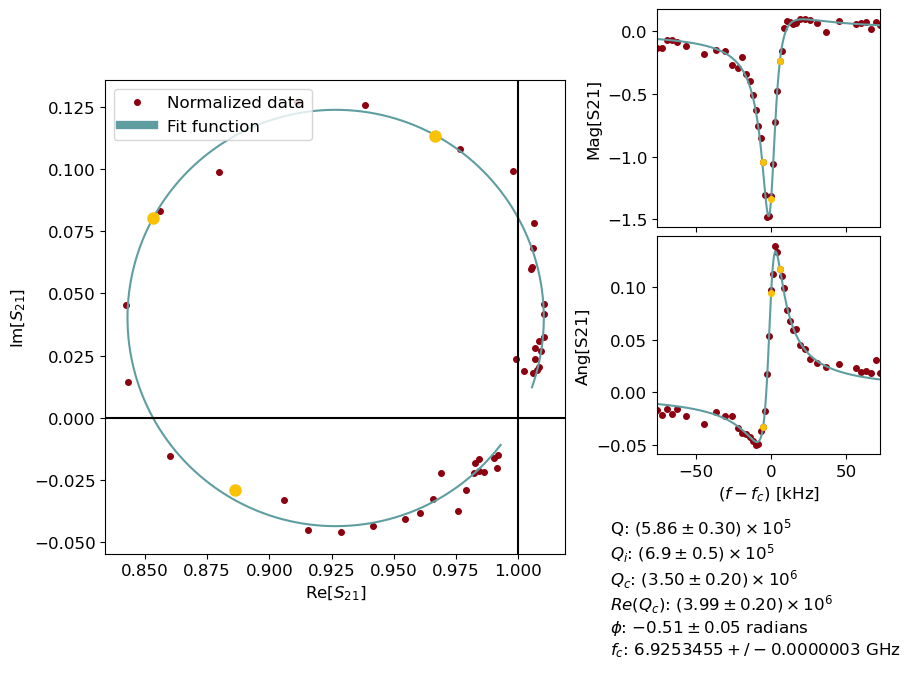

-30.0


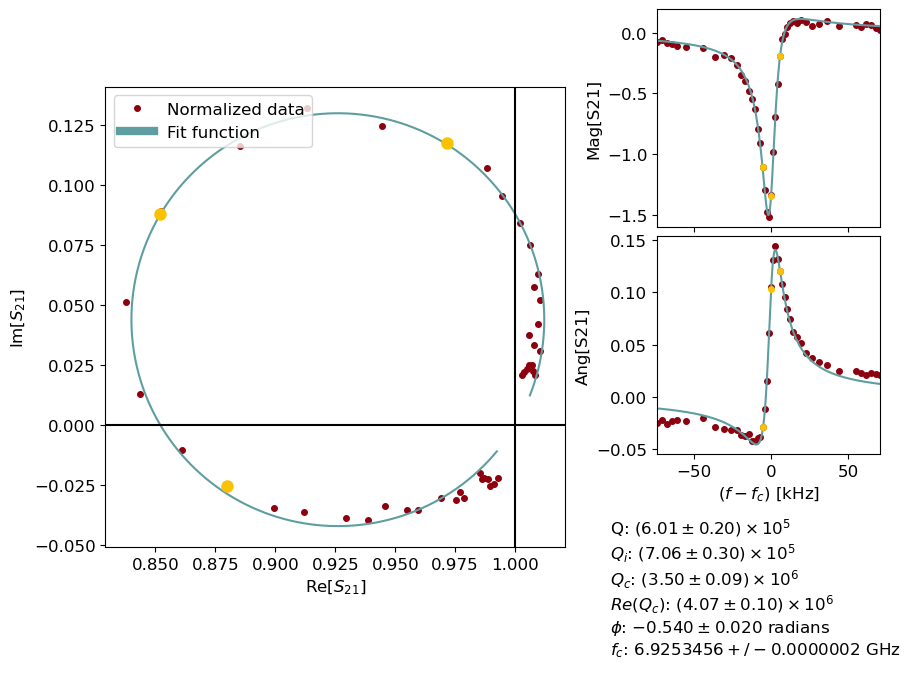

-30.0


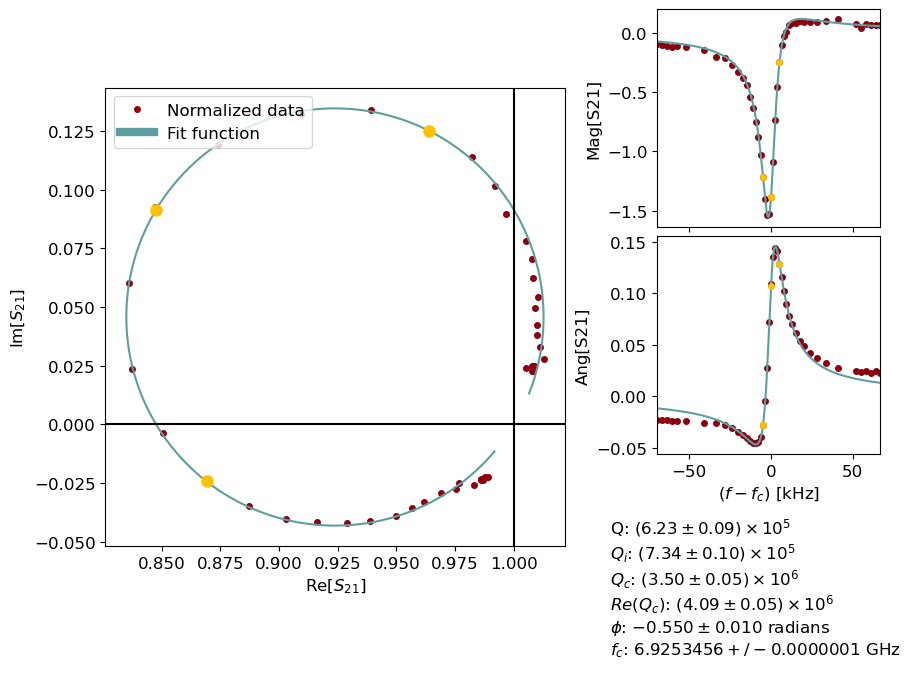

-30.0


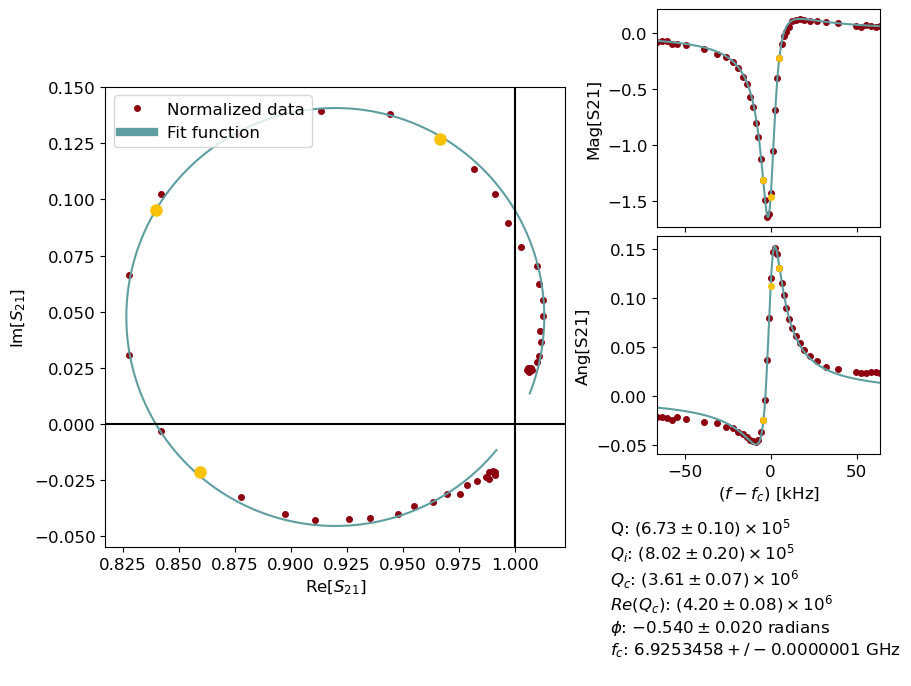

-30.0


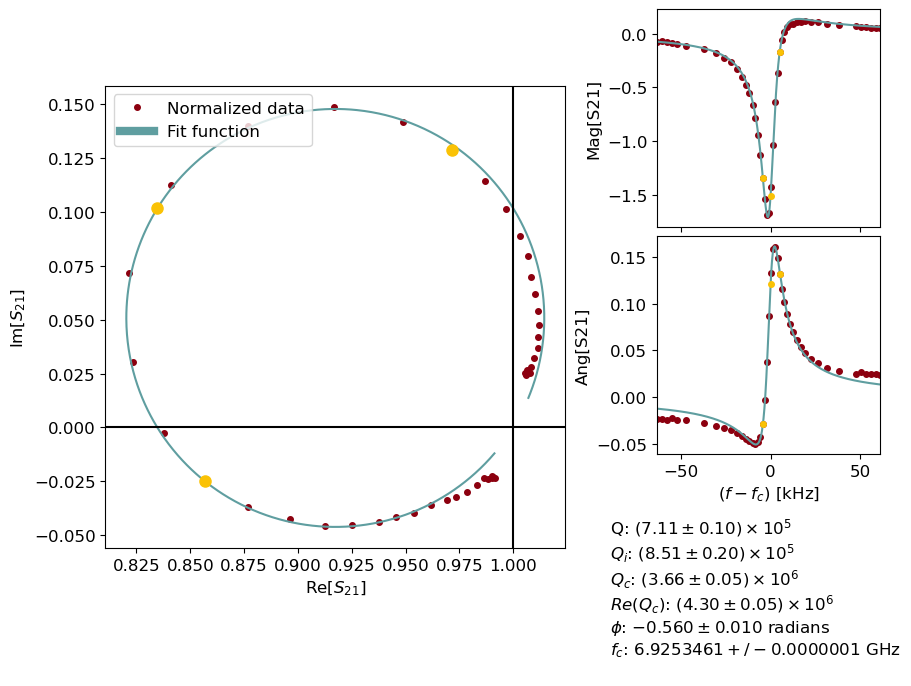

-30.0


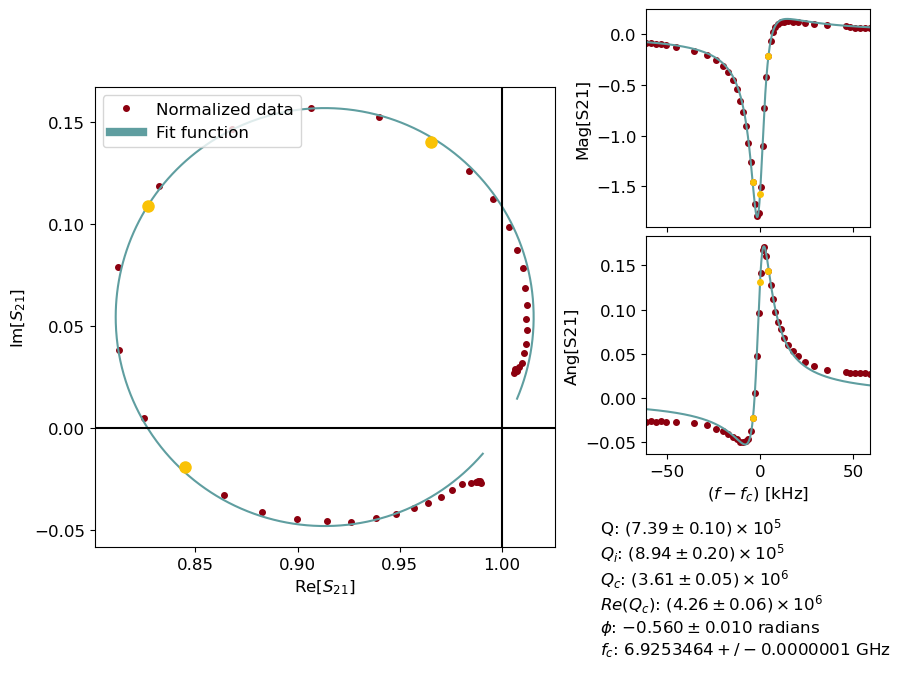

-30.0


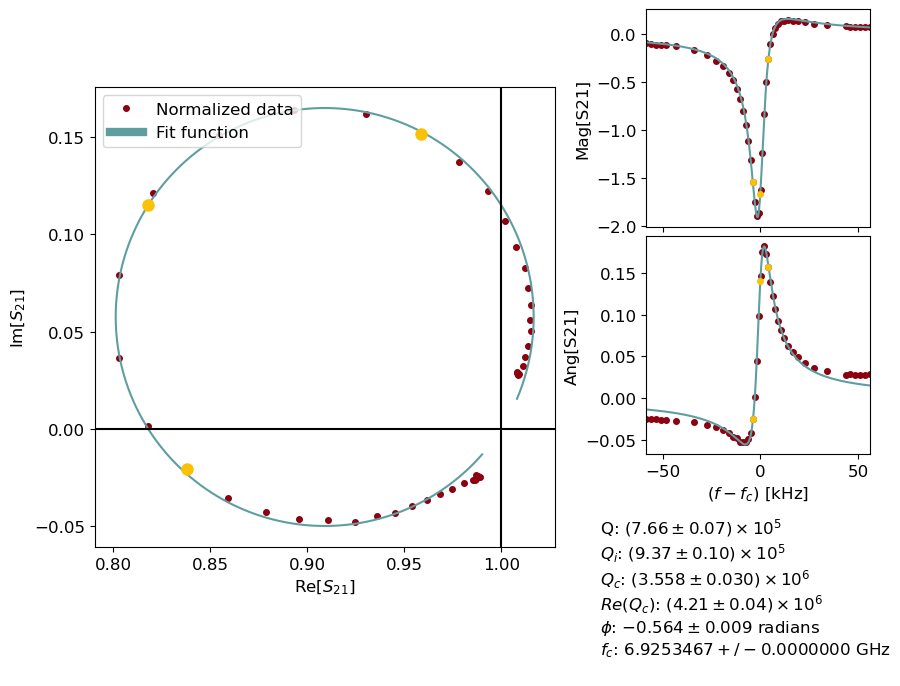

Time elapsed:  122.21868109703064
-30.0


/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Q=41676.625789729485) = 0.9538532576999397 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Qc=756727.2575175788) = 0.0 < max(sigmas)
  warn(errmsg)


>Error when trying to write parameters on plot
>cannot convert float infinity to integer
-30.0


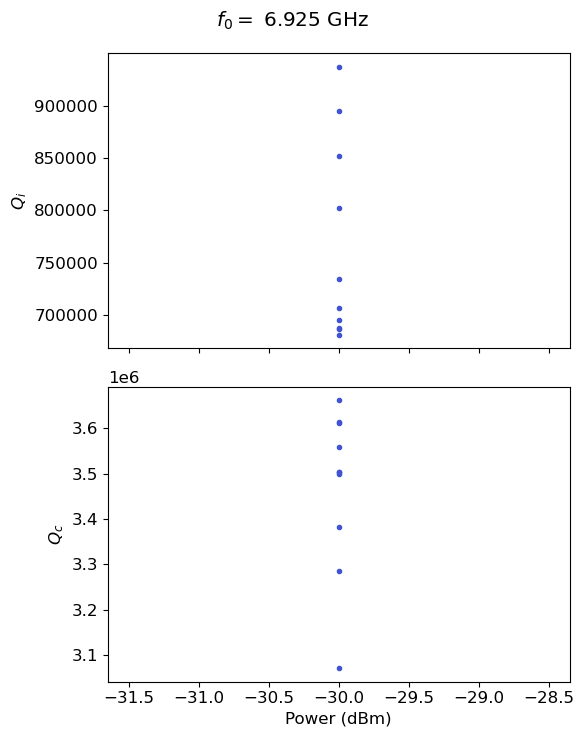

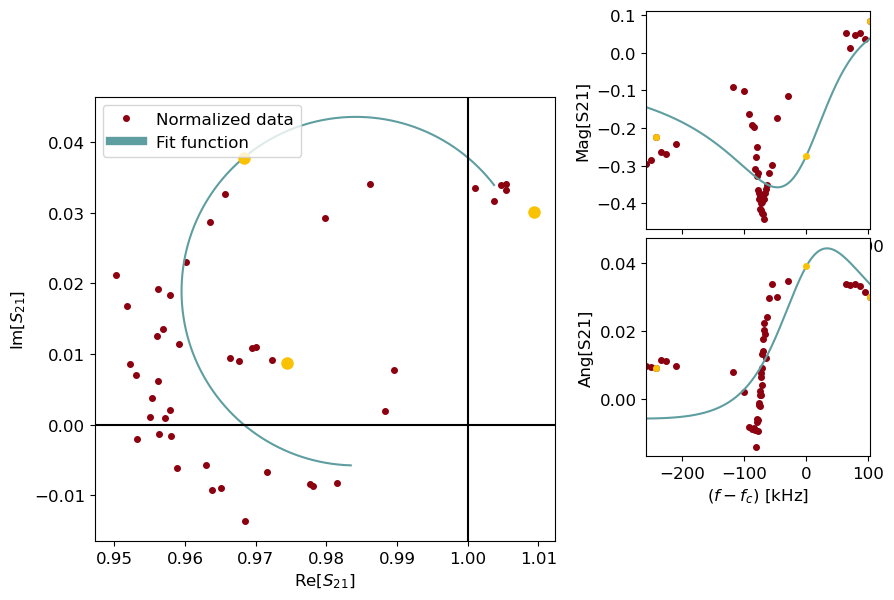

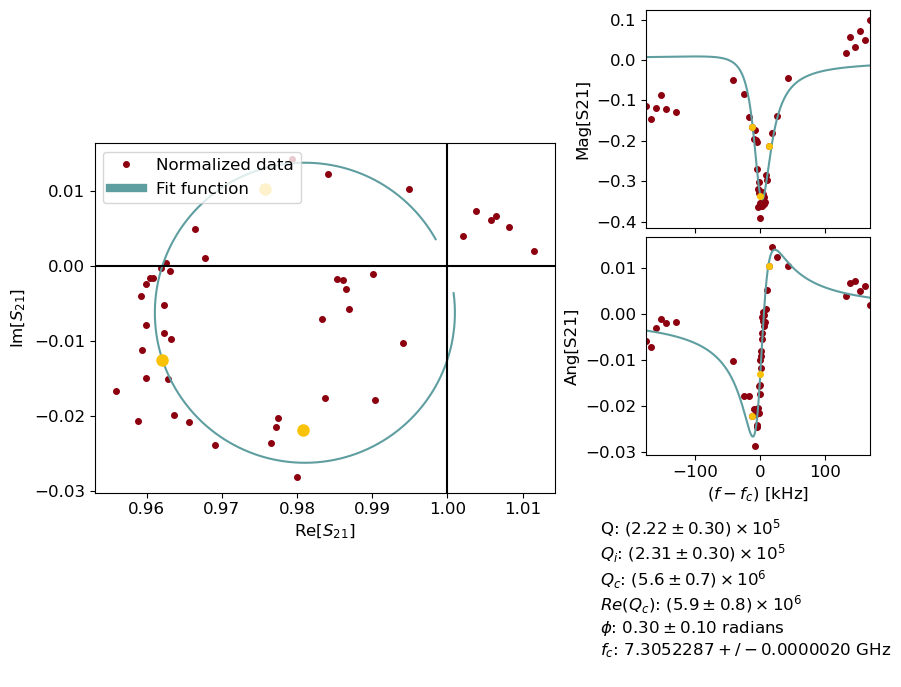

-30.0


/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=86385.85822598252) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=2239415.33832706) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(w1=7305218375.746585) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(w1=7305242382.083713) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(phi=0.09372138599679959) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:330: 

>Error when trying to write parameters on plot
>cannot convert float infinity to integer
-30.0


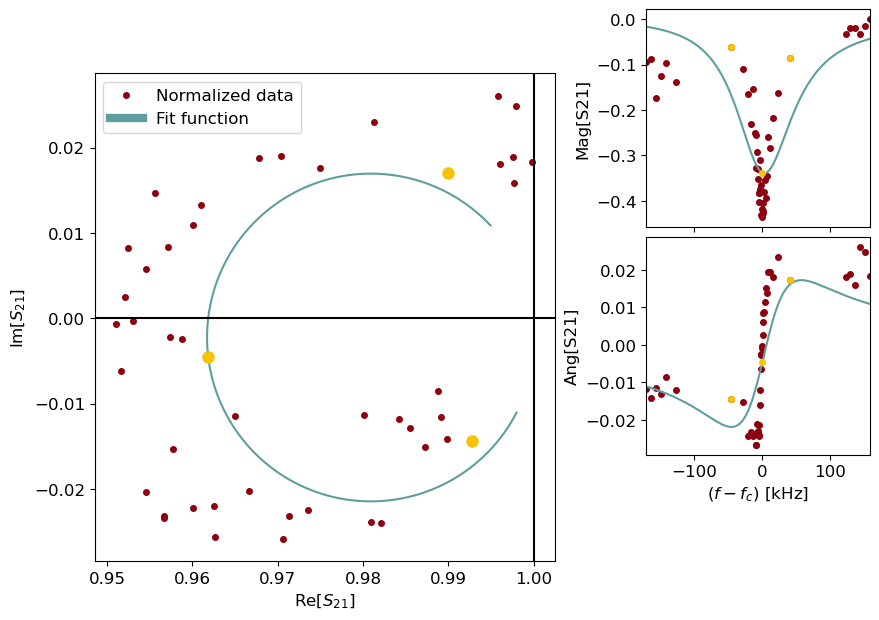

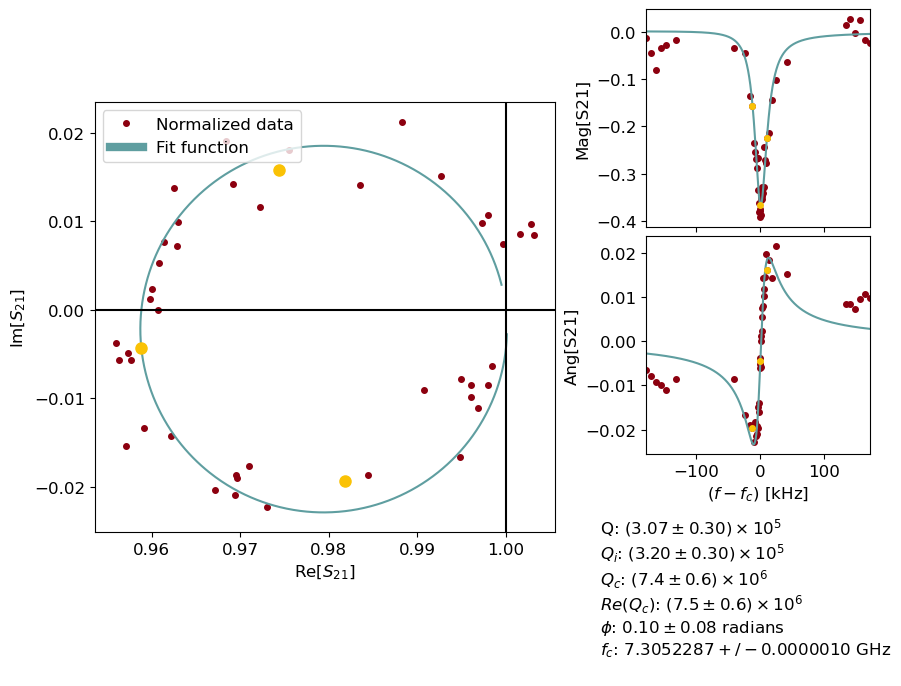

-30.0


/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=54315.90895874853) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=1301236.4662838967) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(w1=7305252407.018811) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(phi=0.03532874966570765) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(phi=0.7139032543795901) = 0.0 < max(sigmas)
  warn(errmsg)


>Error when trying to write parameters on plot
>cannot convert float infinity to integer


-30.0


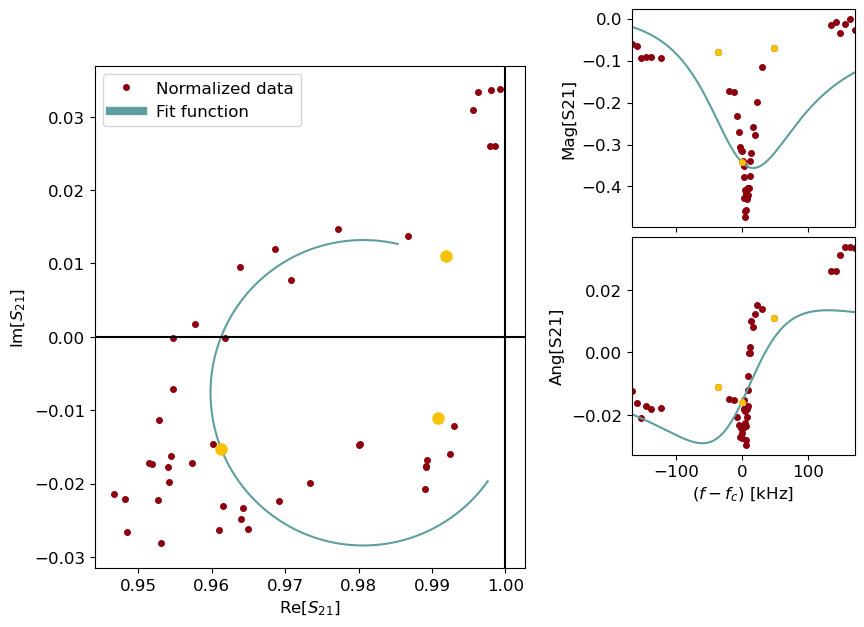

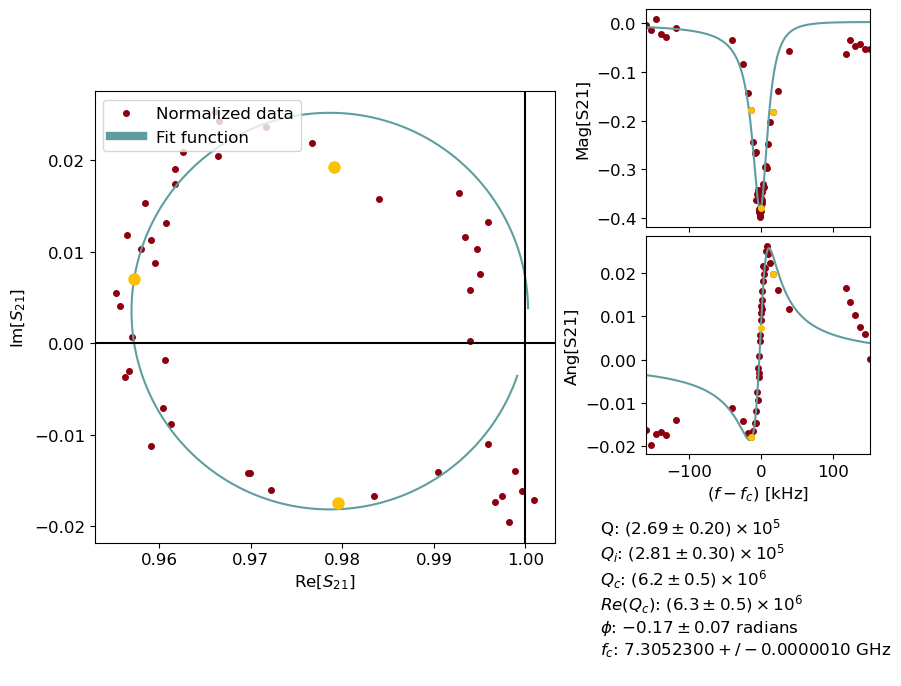

-30.0


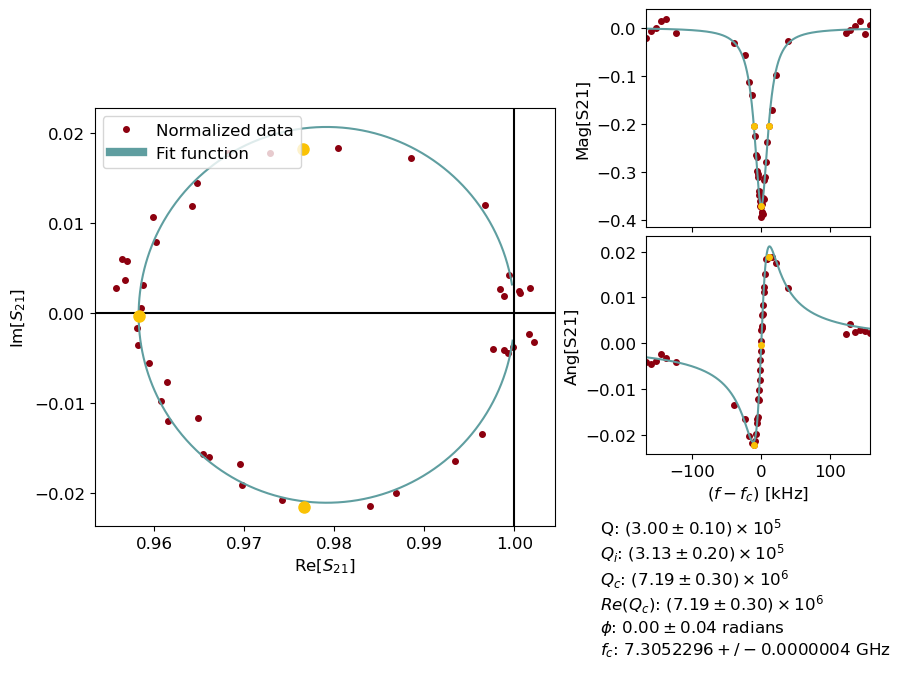

-30.0


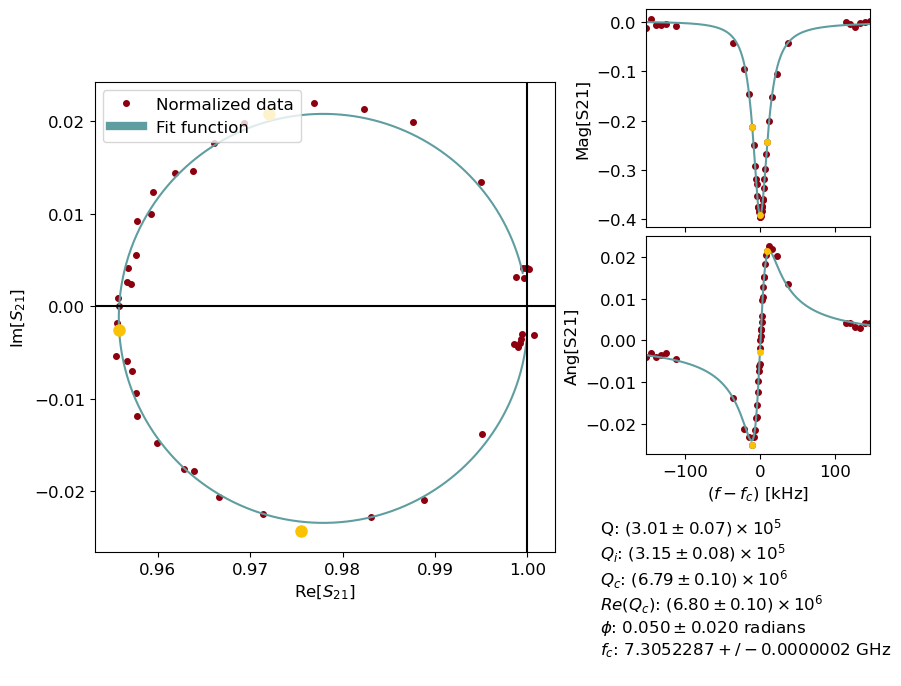

-30.0


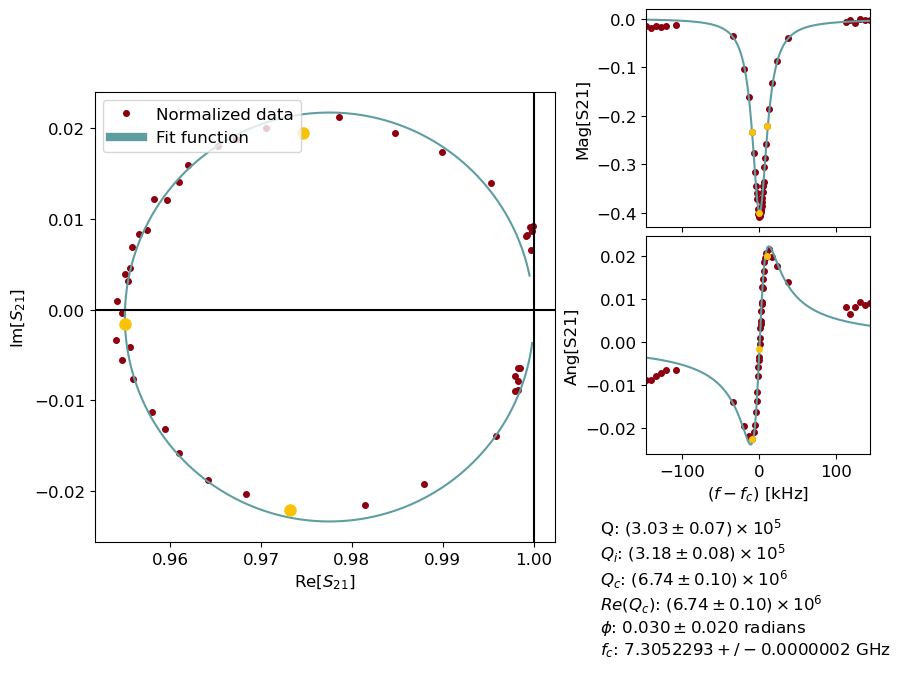

-30.0


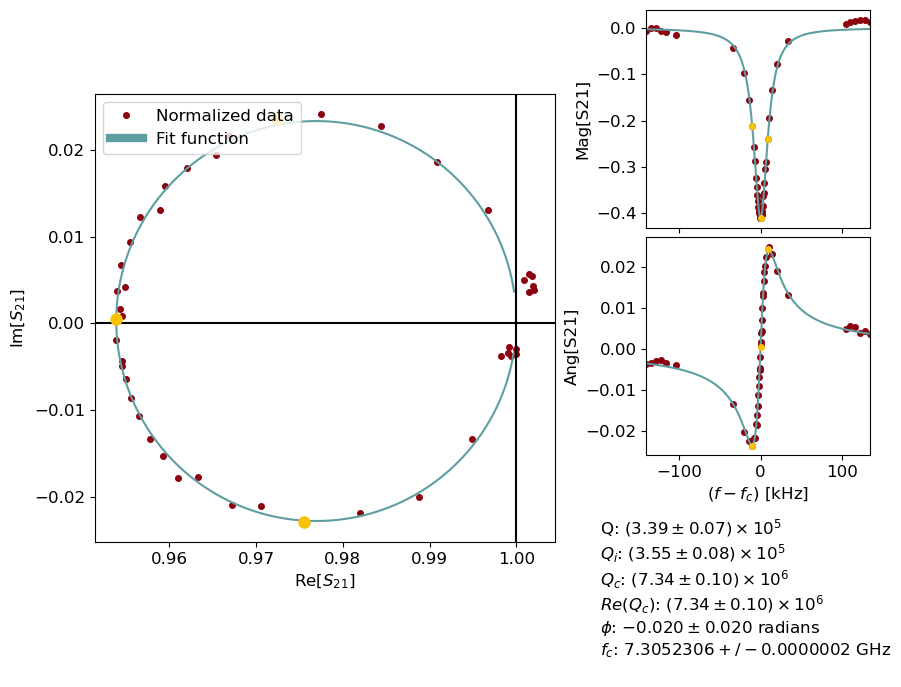

Time elapsed:  133.4021918773651
-30.0


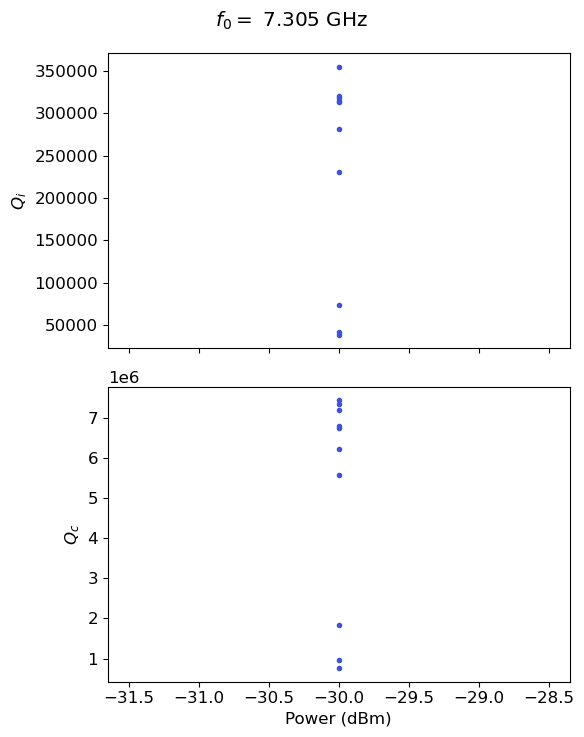

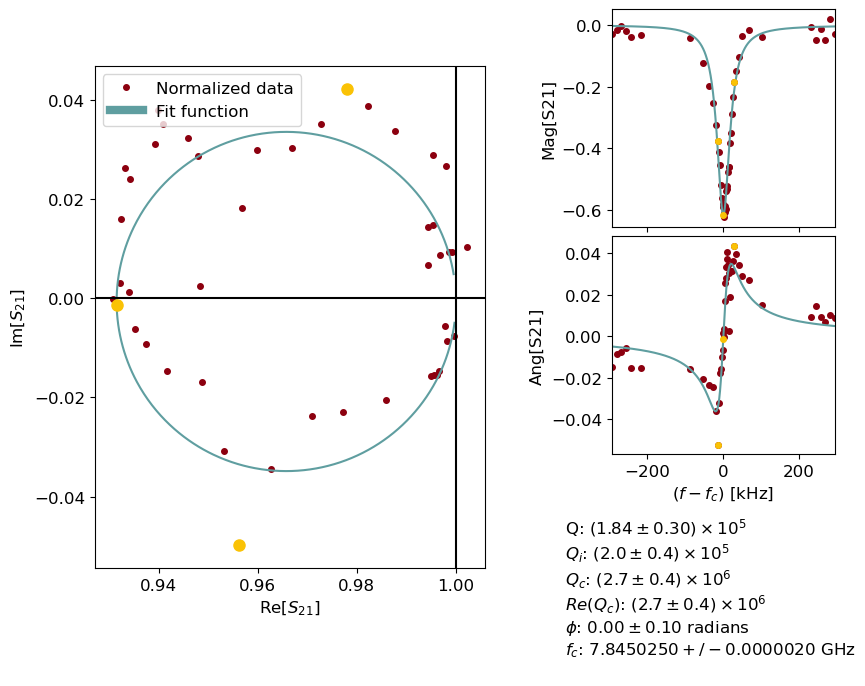

-30.0


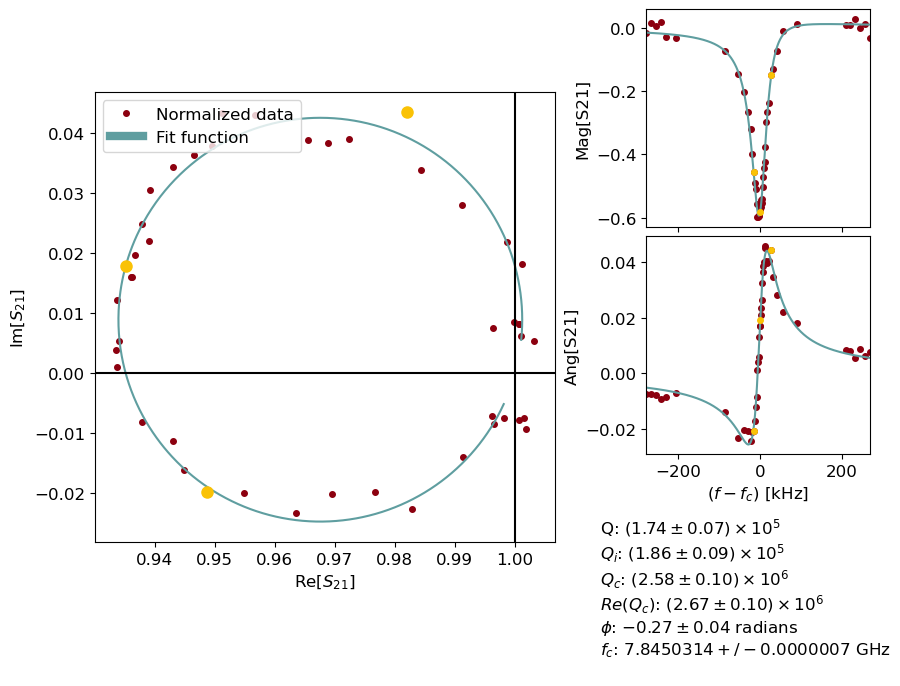

-30.0


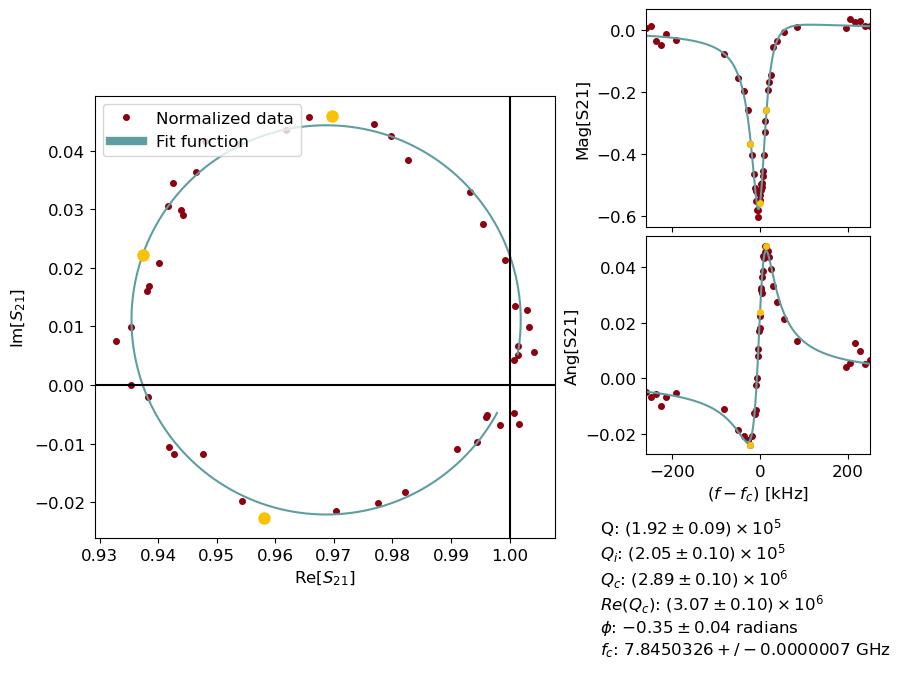

-30.0


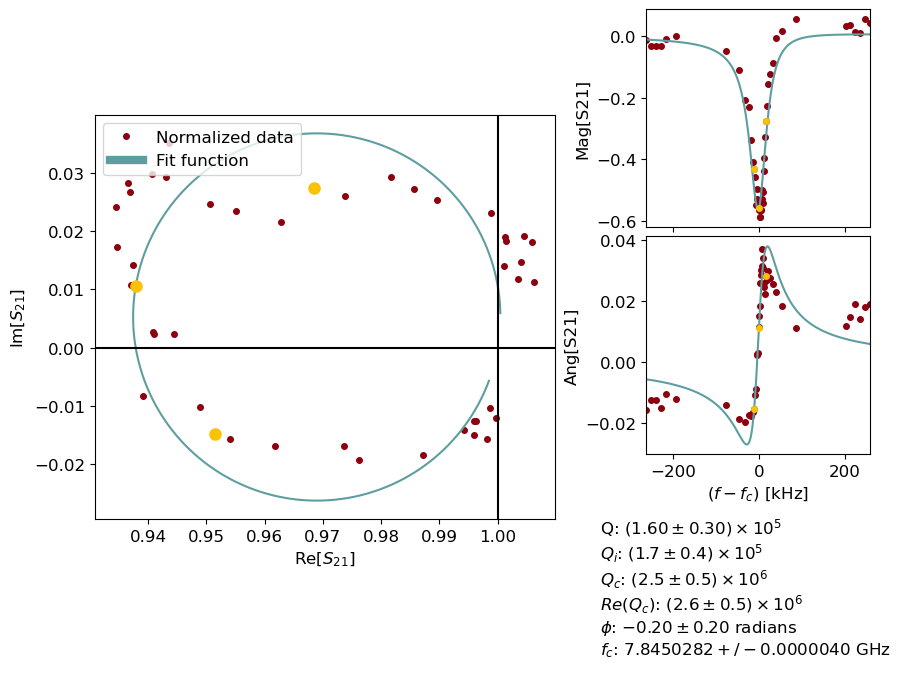

-30.0


/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Qc=2677131.0063300123) = 0.5238465646716115 < max(sigmas)
  warn(errmsg)


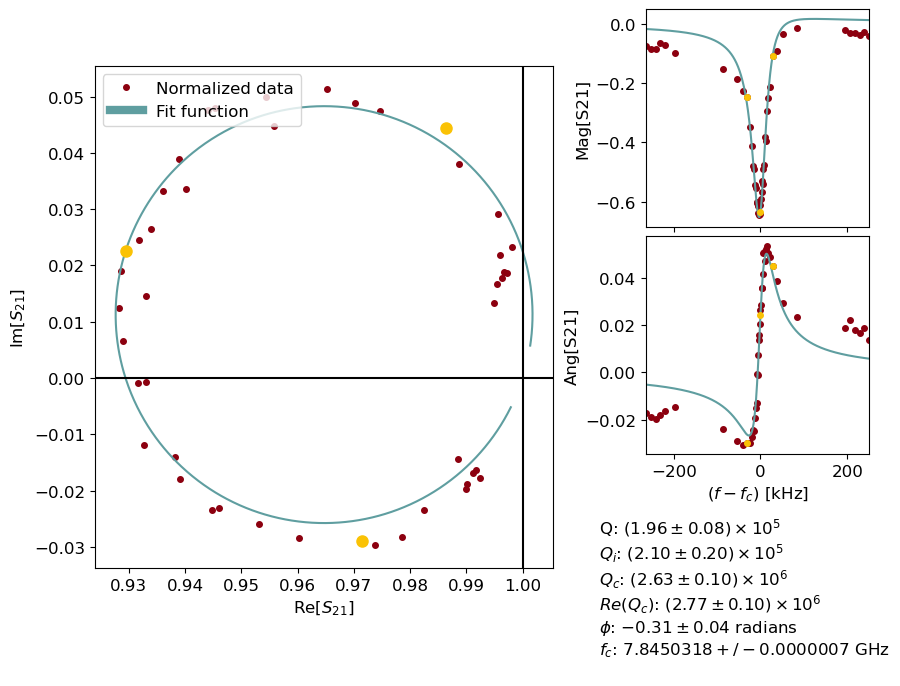

-30.0


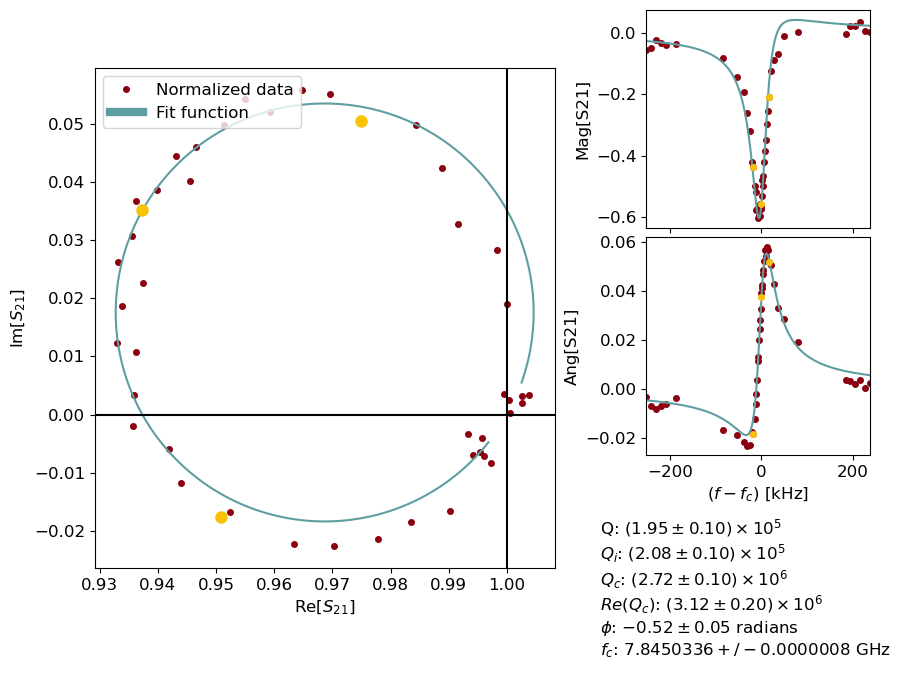

-30.0


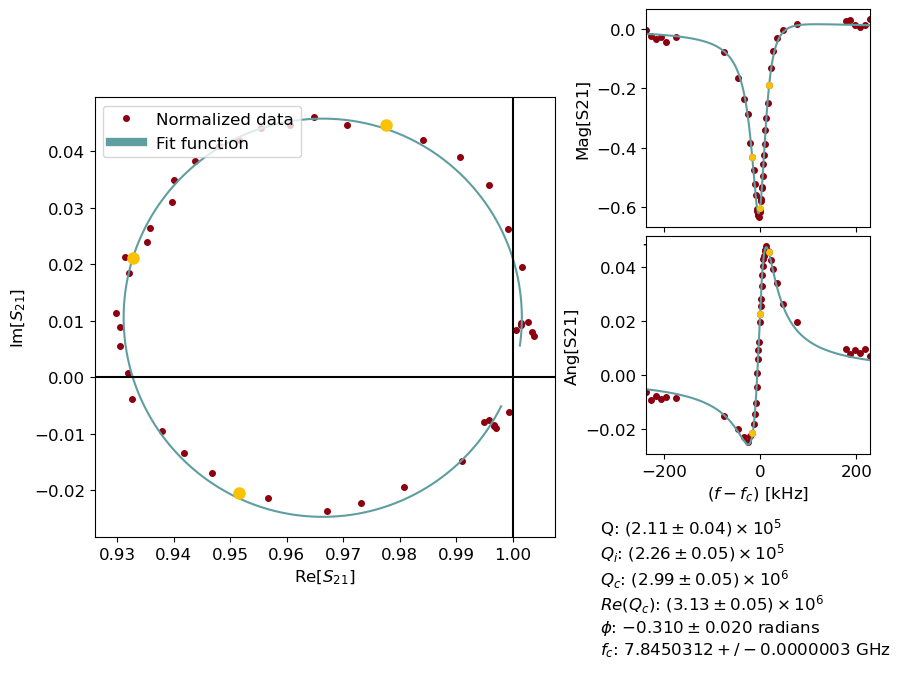

-30.0


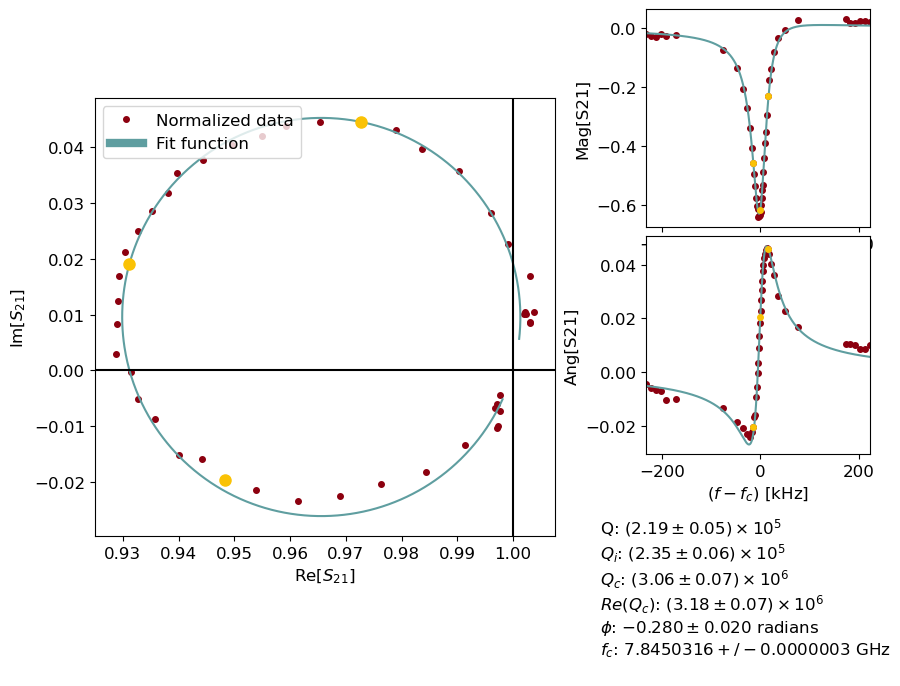

-30.0


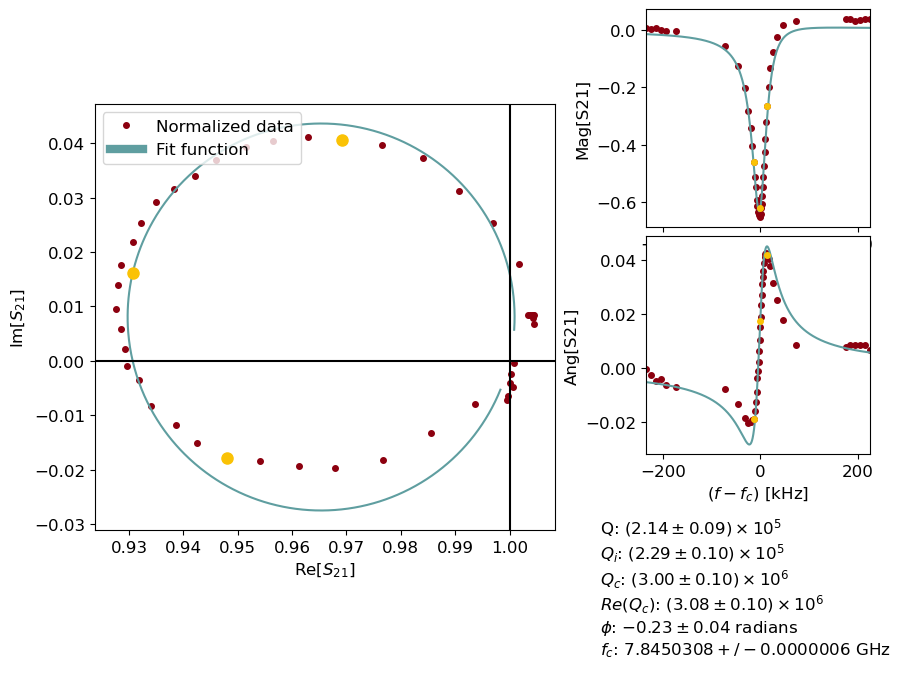

-30.0


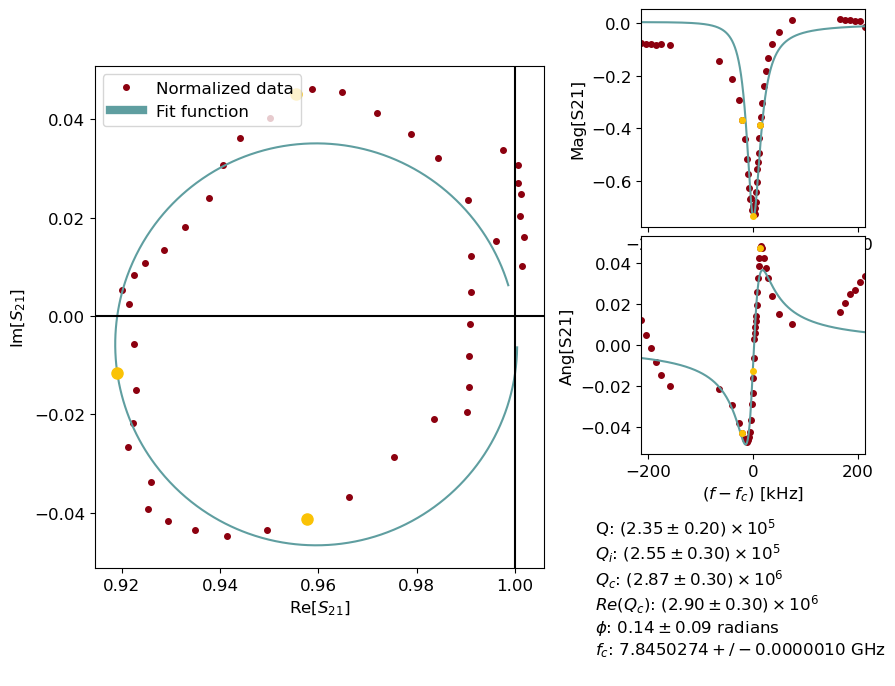

Time elapsed:  145.08359789848328


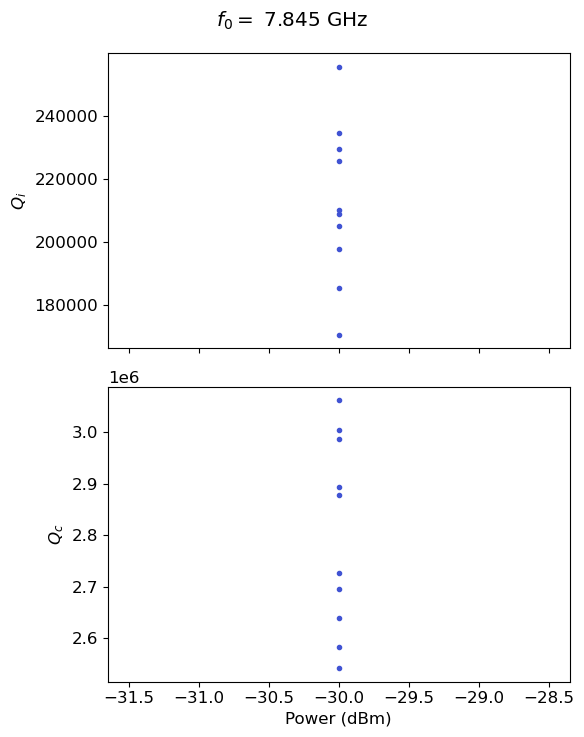

In [40]:
%matplotlib inline
res_params = ana_res.analyze_sweep_gen(params['dir'][ind], data_pth, name=meas, img_pth=img_pth, plot=True, nfiles=params['nfiles'][ind], meas_type=params['meas_type'][ind], slope=slope, fitphase=True)

Counter({63574: 11, 66040: 11, 58912: 11, 62403: 11, 73052: 10, 68543: 10, 69253: 10, 78450: 10})
Counter({63574: 11, 66040: 11, 58912: 11, 62403: 11, 73052: 10, 68543: 10, 69253: 10, 78450: 10})
['res_58912_60', 'res_58912_55', 'res_58912_50', 'res_58912_45', 'res_58912_40', 'res_58912_35', 'res_58912_30', 'res_58912_25', 'res_58912_20', 'res_58912_15', 'res_58912_10']
['res_62403_60', 'res_62403_55', 'res_62403_50', 'res_62403_45', 'res_62403_40', 'res_62403_35', 'res_62403_30', 'res_62403_25', 'res_62403_20', 'res_62403_15', 'res_62403_10']
['res_63574_60', 'res_63574_55', 'res_63574_50', 'res_63574_45', 'res_63574_40', 'res_63574_35', 'res_63574_30', 'res_63574_25', 'res_63574_20', 'res_63574_15', 'res_63574_10']
['res_66040_60', 'res_66040_55', 'res_66040_50', 'res_66040_45', 'res_66040_40', 'res_66040_35', 'res_66040_30', 'res_66040_25', 'res_66040_20', 'res_66040_15', 'res_66040_10']
['res_68543_55', 'res_68543_50', 'res_68543_45', 'res_68543_40', 'res_68543_35', 'res_68543_30',

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/Outputs/Resonators/241125-ResonatorSil3/attensil3_test_sweep_powersweep2_all_data_phase.png'

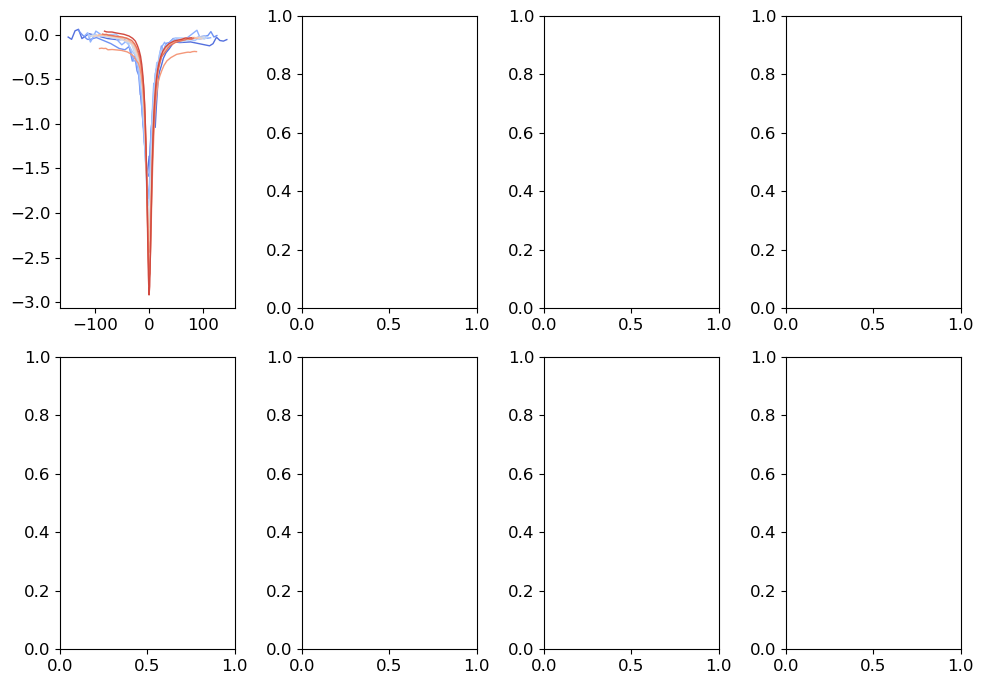

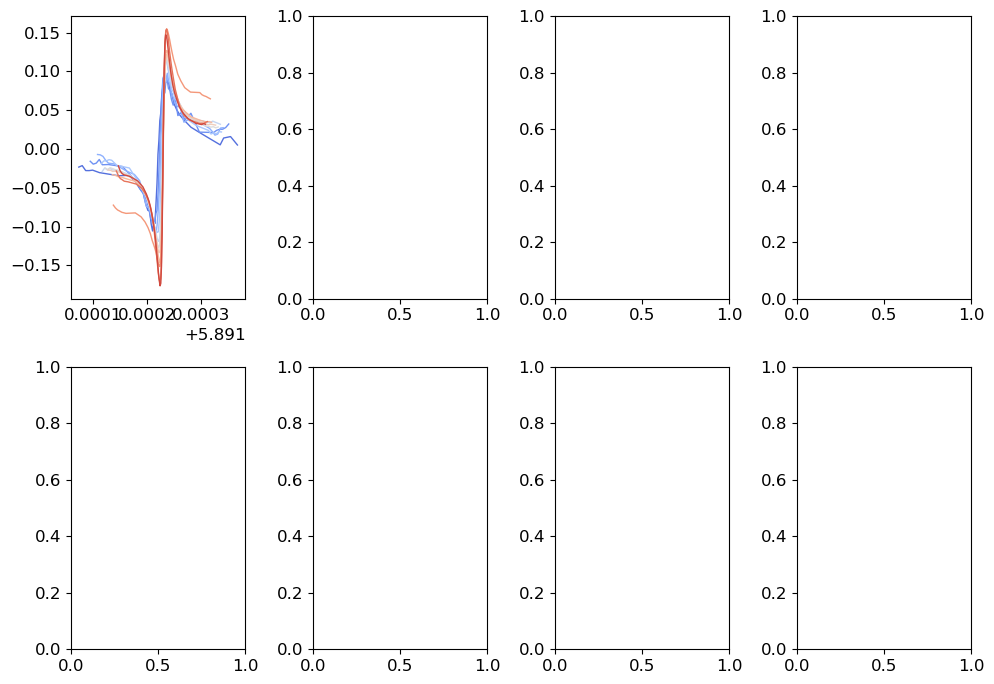

In [41]:

#slope=1135.027
%matplotlib inline
frac = 7.714986
fnames = ana_res.plot_all(params['dir'][ind], data_pth, output_path=img_pth, max_power=-15, norm=True, half_norm=False, nfiles=params['nfiles'][ind], meas_type=params['meas_type'][ind],slope=slope, name = img_name)#, slope=slope)

In [ ]:
#fnames, res_params = ana_res.analyze_sweep_other(params['dir'][ind], data_pth, output_path=img_pth, max_power=-15, nfiles=params['nfiles'][ind], meas_type=params['meas_type'][ind],slope=slope)#, slope=slope)

#### Reorder the data based on pitch (only run once)

In [42]:

if params['meas_type']=='soc':
    res_params = ana_res.convert_power(res_params) 

params, res_params=ana_res.reorder(params, res_params) # only run once!
params['qc'] = np.array([np.nanmedian(res_params[i]['qc']) for i in range(len(res_params))])
params['qc_err'] = np.array([np.nanmedian(res_params[i]['qc_err']) for i in range(len(res_params))])
params['freqs'] = np.array([np.nanmedian(res_params[i]['freqs']) for i in range(len(res_params))])
params['phs'] = np.array([np.nanmedian(res_params[i]['phs']) for i in range(len(res_params))])

In [ ]:
#rp = {key: np.array(value).flatten() for key, value in res_params[0].items() if isinstance(value, np.ndarray)}
#print(rp)
print(rp)

{'freqs': [[6691990029.860747, 6691988317.794426, 6691987727.842293, 6691988762.830199, 6691987990.778632, 6691986463.368099, 6691986666.5641165, 6691986945.764073, 6691988853.851362, 6691990375.073942]], 'phs': [[-0.38045258251836944, -0.33828289456354244, -0.2959224669575735, -0.3367709134096501, -0.3165796437393238, -0.3263140812481533, -0.2978989515564414, -0.23619284762231008, -0.27944982428009957, -0.36124761031179764]], 'q': [[617068.7452293959, 524596.6684853828, 427475.7487524187, 365501.958555468, 290124.51256076794, 247859.87492091913, 221634.2204987757, 203511.07016030882, 163938.43846576978, 150584.77673640978]], 'qi': [[668229.8294879108, 562339.7647700922, 452666.4118988606, 382363.66250642546, 301657.3076893505, 256294.54968866426, 228371.11759630448, 208901.14456713243, 167407.30530535005, 153517.62405292672]], 'qc': [[7483418.238485117, 7373073.450925992, nan, 7822707.247768778, 7211524.346410273, 7133995.683738648, 7182169.617503261, 7668417.542435973, 7604744.863986

In [44]:
for res_param in res_params:
    res_param['pow'] = np.array(list(range(-30, -30 + 5 * len(res_param['pow'][0]), 5)))

In [34]:
res_params

[{'freqs': array([[6.3584e+09, 6.3570e+09, 6.3574e+09, 6.3574e+09, 6.3574e+09,
                 nan, 6.3574e+09, 6.3574e+09, 6.3574e+09, 6.3574e+09,
          6.3574e+09]]),
  'phs': array([[ 0.1777,  0.0308, -0.2501,  0.047 ,  0.0783,     nan,  0.0181,
          -0.1376, -0.0144, -0.102 , -0.1717]]),
  'q': array([[ 23422.7094,    576.5732,  91485.9291,   4310.9042,  16817.7191,
                  nan,  20861.1144,  95635.6132,  23024.4407, 105168.5549,
          116345.4497]]),
  'qi': array([[ 33538.9238,  -1076.162 ,  92919.426 ,   4642.5961,  17167.2849,
                  nan,  21303.6416,  97324.6193,  23541.1875, 107267.0368,
          118626.1051]]),
  'qc': array([[  76432.0908,     375.2516, 5745634.6504,   60271.972 ,
           823391.9185,          nan, 1004107.7176, 5458672.0125,
          1048805.0695, 5347899.5893, 5962654.2539]]),
  'qi_phi': array([[ 33772.2608,  -1074.6982,  92966.2006,   4642.9903,  17168.3821,
                  nan,  21303.7156,  97341.0222,  23541.

In [ ]:
res_params[0]['qc'][0][2]=np.nan
with open('res_params.yaml', 'w') as file:
    for i in range(len(res_params)):
        rp = {key: value.tolist() if isinstance(value, np.ndarray) else value for key, value in res_params[0].items()}
        yaml.dump(rp, file)

### Power sweep and TLS fits

IndexError: invalid index to scalar variable.

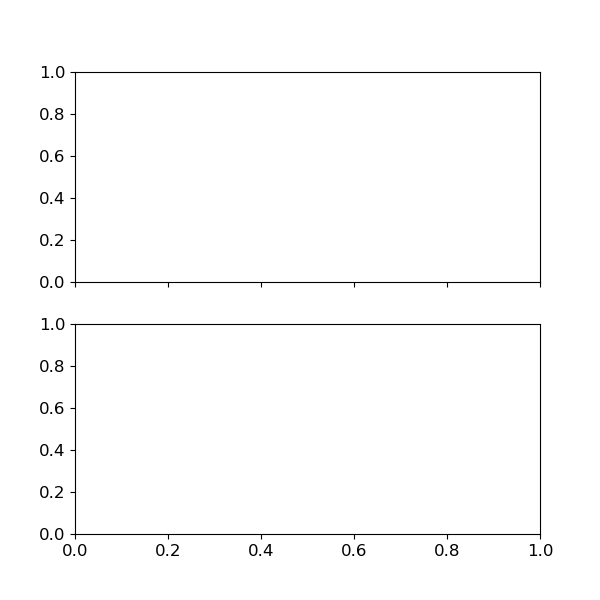

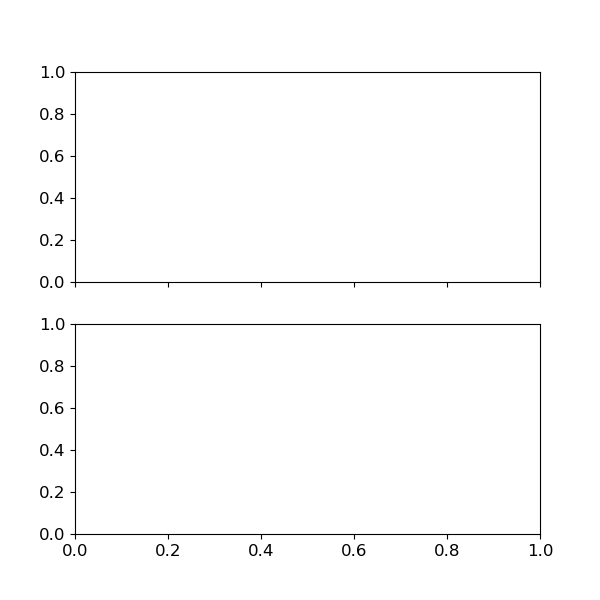

In [46]:
#%matplotlib widget
%matplotlib widget
ana_res.plot_power(res_params, params, img_pth, use_pitch=True)

# min_power = [-135, -135, -100, -135, -135, -135, -100, -130]
# max_power = [24, 18, 0, 35, 37, -30, 18, 23]

min_power = [-85, -90, -80, -90. -85, -85, -85, -85, -90, -85]
max_power = [0, 0, 0, 0, 0, 0, -35, 0, 0, 0]
min_power = [-85, -90, -80, -100, -95, -95, -95, -95, -105, -95]
#cfg = ana_tls.fit_qi(res_params, params, img_pth) 
cfg = ana_tls.fit_qi(res_params, params, img_pth, name=img_name, min_power_vec = min_power) 
# params['qtls0'][2] = float('nan')
# params['qother'][2] = float('nan')

ana_tls.plot_res_pars([params], [''],img_pth, name=img_name)
ana_res.plot_res_pars([params], [''], img_pth, name=img_name)
hy.save_np(params, img_pth+'Text/' +params['pth'][ind][0:-1] +params['meas'][ind] + '.yml')
#hy.save_np(res_params, img_pth+'Text/' +params['pth'][ind][0:-1] +params['meas'][ind] + '_ph.yml')


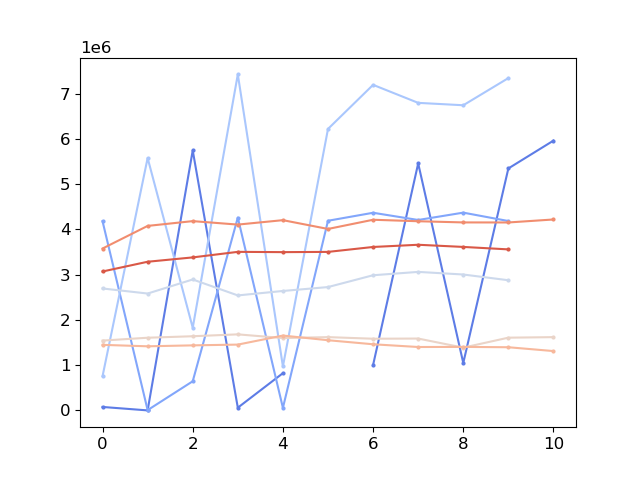

In [60]:
fig, ax= plt.subplots(1,1)
for i in range(len(res_params)):
    ax.plot(res_params[i]['qc'][0],'.-')


In [ ]:
pitch_list = params['pitch']
qtls0 = params['qtls0']
qtls0_err = params['qtls0_err']
qother = params['qother']
qother_err = params['qother_err']

%matplotlib inline
plt.errorbar(np.array(pitch_list)+0.2, qtls0, yerr = qtls0_err, fmt='.', label = 'Q_TLS0', capsize = 2)
plt.errorbar(pitch_list, qother, yerr = qother_err, fmt='.', label = 'Q_Other', capsize = 2)
plt.xlabel('Pitch size [um]')
plt.legend()
plt.ylim(-0.2*10**6, 1.3*10**6)
plt.show()




In [ ]:
params

### Plot with different max and min power for each resonator 

In [ ]:
if sample == 'hf3':
    max_power = [-40, -50, -35, -40, -25, -25, -25, -25]

    cfg = ana_tls.fit_qi(res_params, params, img_pth, max_power_vec = max_power) 
    ana_tls.plot_res_pars([params], [''],img_pth)
    #params_nohf_low_pow = copy.deepcopy(params)
    params_hf = copy.deepcopy(params)
else:
    max_power = [-35, -35, -15, -25, -15, -15, -15, -15]
    min_power = [-115, -115, -115, -115, -100, -95, -90, -90]
    
    cfg = ana_tls.fit_qi(res_params, params, img_pth, max_power_vec = max_power, min_power_vec = min_power) 
    ana_tls.plot_res_pars([params], [''],img_pth)
    params_no_hf = copy.deepcopy(params)

### Print out info for running scans

In [ ]:
lw=[]
freq =[]
print('linewidth')
for i in range(len(params['freqs'])):
    q = 1/(1/params['qi0'][i]+1/params['qc'][i])
    lw.append(params['freqs'][i]/q)
    freq.append(params['freqs'][i])

print(lw)
print(freq)

In [ ]:
%matplotlib widget
#pnames = ['240814-2','240725','240729-2', '240729-4']
#labs = ['ScalinQ (No HF)', 'SLab (No HF)', 'SLab (HF)', 'RFSoC (HF)'] 

#pnames = ['240729-2', '240729-3']
pnames = ['240729-3', '240820_soc']
labs = ['VNA (HF)', 'RFSoC (HF)'] 
plist =[]
for p in pnames:
    plist.append(hy.load(img_pth +'Text/'+ p + '.yml'))

ana_tls.plot_res_pars(plist, labs,img_pth)
ana_res.plot_res_pars(plist, labs,img_pth)


## Single resonators

### Get list of resonators

In [ ]:
# Grab list of resonators following corect format in directory. 

pattern0 = r'res_(\d+)_\d{2,5}dbm'
resonators, file_list0 = ana_res.get_resonators(directories[0],pth, pattern0)

pattern = 'res_{:d}_'.format(resonators[0]) + '(\d{2,3})dbm'
file_list = ana_res.get_resonator_power_list(pattern, file_list0)

### Fit slope for RFSoC phase correction

In [ ]:
pth = r'/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/Data/240816-Resonator'

plt.figure()
data, attrs = hy.prev_data(pth, 'test2')
plt.plot(data['xpts'][0], data['phases'][0])
slope, ofs = np.polyfit(data['xpts'][0], np.unwrap(data['phases'][0]), 1)
data['phases'] = np.unwrap(data['phases'][0]) - slope * data['xpts'][0]-ofs

print(slope)

data['phases']

In [ ]:
# Grab list of resonators following corect format in directory. 

pth = r'/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/Data/240818-Resonator/'

#directories = ['240816-Resonator/powersweep3']
directories = ['powersweep2']
pattern0 = r'res_(\d+)_\d'
resonators, file_list = ana_res.get_resonators(directories[0],pth, pattern0)

In [ ]:
import os

fname =  'res_6423_4096_wideright'
data, attrs = hy.prev_data(pth+directories[0], fname)

data.keys()
files = os.listdir('C:\\_python\\')
print(files)

Single resonator

In [ ]:
data = ana_res.grab_data(pth+directories[0], file_list[4], 'soc', slope=slope)
#ana_res.plot_raw_data(data)
output = ana_res.fit_resonator(data, fname, img_pth, plot=True)   

In [ ]:
sorted_file_list = sorted(file_list)
print(sorted_file_list)

In [ ]:
file_list[12]

In [ ]:
%matplotlib widget

for i in range(len(file_list)):
    #try:
    data = ana_res.grab_data(pth+directories[0], file_list[i])       
    ana_res.plot_raw_data(data)
    #output = ana_res.fit_resonator(data, file_list[i], output_path, 'png')    
    #except: 
    #    print('fit failed')  
7.714986

In [ ]:

pth = '../../../../JJ_fab/Coherence Sample/Resonators Measurement/240725/data/power_sweep5'
fname = 'res_7083855_60dbm_wide'
data = ana_res.grab_data(pth, fname)
output = ana_res.fit_resonator(data, fname, img_pth, plot=True)   
ana_res.plot_raw_data(data)

## Temp sweep

In [ ]:
# Initialize the directories list for a temperature sweep 
temps, directories = ana_res.get_temp_list(pth_base, max_temp=1500)
res_params = ana_res.analyze_sweep(directories)

ana_res.plot_power_temp(res_params,i,params,img_pth)